In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('muted')
sns.set_color_codes('muted')

In [5]:
## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data/Replication'
os.chdir(filepath)

In [6]:
print 'Pandas version ' + pd.__version__

Pandas version 0.17.1


In [7]:
filenames = glob.glob('Nline_*.mat')
#print filenames
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = filenames[0].find('_') + 1
    id2 = filenames[0].find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
#data_dict.keys()

In [8]:
sub_ex = data_dict.keys()[-1]

In [9]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [10]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
data_dict[sub_ex]['p']['NlineResults'][0][0][1][13][2][0][0]
#len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

0

In [11]:
#data_dict[sub_ex]['p'].dtype.names

In [12]:
#Comment this out for include all subjects
#del data_dict['s_']

Bad data removed based on number of missed trials or too many large estimation errors

In [13]:
del data_dict['s_04104']
del data_dict['s_04116']
del data_dict['s_04117']
del data_dict['s_04208']

In [14]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [15]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'Run_'+str(run)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [16]:
#new_dat[sub_ex]['NlineResults']['Run_1'].keys()

In [17]:
new_dat[sub_ex]['NlineResults']['Run_1']['Probe']

[array([3], dtype=uint8),
 array([11], dtype=uint8),
 array([77], dtype=uint8),
 array([45], dtype=uint8),
 array([28], dtype=uint8),
 array([74], dtype=uint8),
 array([85], dtype=uint8),
 array([21], dtype=uint8),
 array([60], dtype=uint8),
 array([7], dtype=uint8),
 array([98], dtype=uint8),
 array([36], dtype=uint8),
 array([65], dtype=uint8),
 array([33], dtype=uint8),
 array([57], dtype=uint8),
 array([90], dtype=uint8),
 u'ox',
 u'or',
 u'as',
 u'my',
 u'it',
 u'he',
 u'of',
 u'be',
 u'is',
 u'by',
 u'we',
 u'do',
 u'am',
 u'so',
 u'if',
 u'me',
 array([20], dtype=uint8),
 array([-94], dtype=int16),
 array([-86], dtype=int16),
 array([70], dtype=uint8),
 array([-58], dtype=int16),
 array([80], dtype=uint8),
 array([-34], dtype=int16),
 array([-28], dtype=int16),
 array([-78], dtype=int16),
 array([14], dtype=uint8),
 array([48], dtype=uint8),
 array([54], dtype=uint8),
 array([-10], dtype=int16),
 array([96], dtype=uint8),
 array([30], dtype=uint8),
 array([-44], dtype=int16)]

In [18]:
#new_dat[sub_ex]['NlineResults']['Run_1']['catch_probe']

In [19]:
#new_dat[sub_ex]['NlineResults']['Run_1']['MouseTrack']

In [20]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['Run_0'].keys())

In [21]:
#indexes[90]

In [22]:
#indexes[1][1]

In [23]:
varnames = new_dat[sub_ex][Nline]['Run_0'].keys()

In [24]:
#len(indexes)

In [25]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe', 'MouseTrack', 'Probe']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if var == probes[0]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
        elif var == probes[1]:
            if new_dat.get(data[0]).get(Nline).get(data[1]).get(var,0) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1])[var] = []
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)) <= data[2]:
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
        elif var == probes[2]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 1:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 2:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
        else:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
    Dic_list.append(temp_dict)

In [26]:
#Dic_list[10]

In [27]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
#sum(nline_df.loc[sub_ex].loc['Run_0'].iloc[0:48]['catch'])

In [28]:
#nline_df.loc[sub_ex].loc['Run_0'].iloc[0:10]['Error']

In [29]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
#nline_df.index.names

In [30]:
#plt.plot(nline_df.loc['s_04102','Run_2',0]['MouseTrack'])

### Create Stim Labels

Data Column Names

In [31]:
nline_df.columns

Index([u'BadPress', u'Block', u'Click', u'Correct', u'Error', u'ITI_onset',
       u'ITI_onset_real', u'Line_pct', u'MouseTrack', u'Move', u'Points',
       u'Probe', u'RT', u'RTHold', u'Response', u'Slow', u'Task', u'TestX',
       u'Trial', u'Wrong', u'catch', u'catch_probe', u'consider_onset',
       u'consider_onset_real', u'decision_end', u'decision_end_real',
       u'decision_onset', u'decision_onset_real', u'hold', u'hold_onset',
       u'hold_onset_real', u'iti', u'mouse_pos'],
      dtype='object')

# Number Line Analyses

### Accuracy & RT

In [32]:
nline_no_miss = nline_df[['Error', 'RT', 'RTHold', 'catch', 'Task', 'Line_pct', 'Response']]
nline_no_miss = nline_no_miss[nline_no_miss['catch']<1]
#len(nline_no_miss)

In [33]:
nline_no_miss = nline_no_miss.replace(-1, np.nan)
nline_no_miss = nline_no_miss.drop('catch', 1)

In [34]:
nline_no_miss['Missed'] = nline_no_miss['Error']
nline_no_miss['Missed'][nline_no_miss['Missed']<1] = 0
#nline_missed

In [35]:
nline_missed = nline_no_miss.loc[nline_no_miss['Missed']==1,:]
position_missed = nline_no_miss.groupby(['Task', 'Line_pct'])
position_missed = position_missed['Missed']

In [36]:
#nline_no_miss['Missed']

In [37]:
responded = nline_no_miss.copy()
responded.loc[:,:] = nline_no_miss.loc[nline_no_miss['Missed']==0,:]
responded['AbsError'] = np.abs(responded['Error'])
#nline_no_miss

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py:212: PerformanceWarning: indexing past lexsort depth may impact performance.
  handler(stream, idents, msg)


In [38]:
responded = responded[pd.notnull(responded['Task'])]

In [39]:
responded.Line_pct.unique()

array([ 0.28,  0.98,  0.21,  0.77,  0.11,  0.07,  0.85,  0.36,  0.74,
        0.03,  0.65,  0.9 ,  0.45,  0.6 ,  0.33,  0.57])

## How many trials missed?

In [40]:
nline_missed['Missed'].groupby(level=0).sum()

Subject
s_04101     4
s_04102    10
s_04103    11
s_04105    15
s_04106    20
s_04107    15
s_04108     1
s_04109     4
s_04110     8
s_04111     2
s_04112     8
s_04113    15
s_04114     3
s_04118     6
s_04119     1
s_04120     9
s_04201     2
s_04202     3
s_04203     9
s_04204     4
s_04205     4
s_04206     3
s_04207     8
s_04209     3
s_04210     5
s_04211     2
s_04212     3
s_04213     9
s_04214    18
s_04215    14
s_04216     2
s_04217     2
s_04218     3
s_04219     7
s_04220     5
Name: Missed, dtype: float64

In [41]:
missed = nline_missed['Missed'].groupby(level=0).sum()

In [42]:
##Subject Standard Deviations (title for markdown deleted)
#nline_no_miss_subj.std()

In [43]:
##Overall Standard Deviation (deleted from markdown)
#np.mean(nline_no_miss_subj.std())

##How many trials did they actually respond?

Subject s_04102 only answered 6 trials of 4th run

S_04116 seems to have not understood the word task ** Also slope of estimates for N+ (see way below) is 0.4 really far off from a slope close to 1 li the rest of subjects

S_04208 has highest misses of my batch and also has a 0,48 slope(see way below)

S_04117 has 37 missed trials and also has 0.78 slope (see way below)

S_04104 has 37 missed trials but slope in normal range

In [44]:
responded['RT'].groupby(level=0).count()

Subject
s_04101    140
s_04102    102
s_04103    133
s_04105    129
s_04106    124
s_04107    129
s_04108    143
s_04109    140
s_04110    136
s_04111    142
s_04112    136
s_04113    129
s_04114    141
s_04115    144
s_04118    138
s_04119    143
s_04120    135
s_04201    142
s_04202    141
s_04203    135
s_04204    140
s_04205    140
s_04206    141
s_04207    136
s_04209    141
s_04210    139
s_04211    142
s_04212    141
s_04213    135
s_04214    126
s_04215    130
s_04216    142
s_04217    142
s_04218    141
s_04219    137
s_04220    139
dtype: int64

# RT Histograms

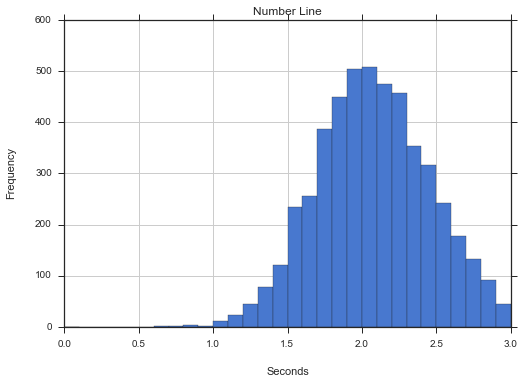

In [45]:
#pd.options.display.mpl_style = 'default'
responded['RT'].hist(bins=30, range=[0,3])
plt.ylim([0,600])
plt.title('Number Line')
plt.xlabel('Seconds', labelpad = 18)
plt.ylabel('Frequency', labelpad = 18)

## Missed by position (across subjects)

In [46]:
position_missed.sum()

Task  Line_pct
1     0.03         4
      0.07         9
      0.11         5
      0.21         6
      0.28         5
      0.33         8
      0.36         7
      0.45         4
      0.57         3
      0.60         1
      0.65         1
      0.74         3
      0.77        12
      0.85         5
      0.90         6
      0.98         4
2     0.03         6
      0.07         4
      0.11         4
      0.21         9
      0.28         5
      0.33         3
      0.36         2
      0.45         2
      0.57         2
      0.60         2
      0.65         4
      0.74         5
      0.77         7
      0.85        10
      0.90         5
      0.98         5
3     0.03         4
      0.07        10
      0.11         6
      0.21         3
      0.28         2
      0.33         2
      0.36         4
      0.45         4
      0.57         5
      0.60         4
      0.65         5
      0.74         7
      0.77         3
      0.85         4
      0.90        1

In [47]:
missed_position = position_missed.sum()
pos_miss_1 = missed_position.iloc[0:16]
pos_miss_2 = missed_position.iloc[16:32]
pos_miss_3 = missed_position.iloc[32:48]
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
#len(pos_miss_1)

The following code gives me a list for the palette and I can iterate through it for the colors I need

In [48]:
pal = sns.color_palette()

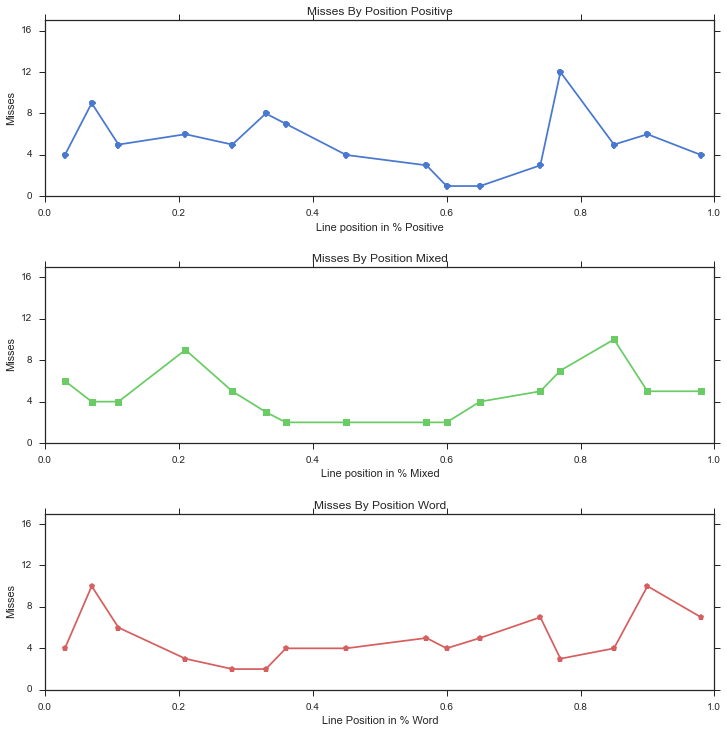

In [49]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, pos_miss_1, 'o-', color=pal[0])
plt.title('Misses By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, pos_miss_2, color=pal[1], marker='s')
plt.title('Misses By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, pos_miss_3, color=pal[2], marker='p')
plt.title('Misses By Position Word')
plt.xlabel('Line Position in % Word', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

plt.subplots_adjust(hspace=.4)

## RTHold missed analysis

## RTHold  MIssed Subject Average

In [50]:
nline_missed['RTHold'].groupby(level=0).mean()

Subject
s_04101    0.760889
s_04102    1.330117
s_04103    0.575732
s_04105    0.623258
s_04106    0.736115
s_04107    0.550096
s_04108    0.369036
s_04109    1.114158
s_04110    0.602176
s_04111    0.688119
s_04112    0.403312
s_04113    0.728374
s_04114    0.600681
s_04118    0.704647
s_04119    0.773352
s_04120    0.948407
s_04201    1.150705
s_04202    0.518021
s_04203    0.556139
s_04204    1.089988
s_04205    0.591679
s_04206    0.398903
s_04207    0.362602
s_04209    0.394067
s_04210    0.461892
s_04211    0.482860
s_04212    1.264613
s_04213    1.199714
s_04214    0.625229
s_04215    0.734159
s_04216    0.548096
s_04217    0.435670
s_04218    1.193555
s_04219    0.977487
s_04220    1.012856
Name: RTHold, dtype: float64

## RTHold Missed Overall Average

In [51]:
np.mean(nline_missed['RTHold'].groupby(level=0).mean())

0.7287628828764927

In [52]:
responded.loc[:,'RT_Diff'] = responded['RT']-responded['RTHold']

## Averages by subjected for responded trials

In [53]:
responded[['Error', 'RT', 'RTHold', 'RT_Diff', 'AbsError']].groupby(level=0).mean()

Error        RT    RTHold   RT_Diff  AbsError
Subject                                                  
s_04101  0.000367  2.126994  0.438679  1.688315  0.014450
s_04102 -0.001154  2.086361  0.562893  1.523468  0.029723
s_04103 -0.005674  2.213000  0.419749  1.793251  0.014655
s_04105 -0.004287  2.187713  0.453583  1.734130  0.018730
s_04106 -0.005307  2.278004  0.464659  1.813344  0.021909
s_04107  0.001220  2.255703  0.419663  1.836041  0.019135
s_04108 -0.005221  1.916144  0.392673  1.523472  0.018594
s_04109 -0.009659  1.953166  0.394496  1.558670  0.029116
s_04110 -0.000969  2.047309  0.440873  1.606436  0.028729
s_04111  0.002461  2.056291  0.459536  1.596756  0.025027
s_04112 -0.003342  2.103643  0.379292  1.724351  0.018053
s_04113  0.005006  2.113399  0.479461  1.633939  0.020232
s_04114 -0.000073  2.162765  0.468522  1.694243  0.021499
s_04115 -0.003848  1.681983  0.341007  1.340976  0.027523
s_04118 -0.001219  2.029640  0.505598  1.524042  0.027642
s_04119  0.000282  2.164869  0.566043  1.598826  0.015229
s_04120 -0.002919  1.967092  0.506782  1.460311  0.022767
s_04201  0.000109  2.112684  0.415970  1.696715  0.020066
s_04202 -0.007061  1.934750  0.404929  1.529822  0.025813
s_04203 -0.002844  2.157114  0.486090  1.671024  0.022175
s_04204  0.000505  2.058401  0.462040  1.596360  0.017634
s_04205 -0.001892  1.702630  0.367640  1.334990  0.025618
s_04206 -0.002355  2.111679  0.442770  1.668909  0.016909
s_04207  0.008149  2.298960  0.351908  1.947052  0.024880
s_04209  0.006372  2.017092  0.395809  1.621284  0.021018
s_04210 -0.005013  2.026506  0.443229  1.583276  0.028602
s_04211 -0.002492  2.047835  0.411585  1.636250  0.018023
s_04212  0.002865  2.140149  0.387630  1.752519  0.017951
s_04213 -0.002518  2.126803  0.572940  1.553863  0.027444
s_04214  0.025790  2.300428  0.543033  1.757395  0.043720
s_04215  0.009148  2.222391  0.470715  1.751676  0.030634
s_04216 -0.002867  2.157417  0.408812  1.748605  0.013300
s_04217 -0.006918  2.066301  0.416229  1.650072  0.018805
s_04218  0.010520  1.838213  0.366438  1.471775  0.028594
s_04219  0.015945  2.080904  0.478462  1.602441  0.031703
s_04220 -0.000619  2.174687  0.381142  1.793545  0.016055

## Overall Averages

In [54]:
np.mean(responded[['Error', 'RT', 'RTHold','RT_Diff','AbsError']].groupby(level=0).mean())

Error       0.000291
RT          2.081084
RTHold      0.441691
RT_Diff     1.639393
AbsError    0.022832
dtype: float64

In [55]:
responded['BigError'] = 0
responded.loc[responded['AbsError']>0.15, 'BigError'] = 1
responded['BigError'].sum()

61

In [56]:
responded.loc[:,:] = responded.loc[responded['BigError']==0,:]

In [57]:
responded = responded[pd.notnull(responded['Missed'])]

In [58]:
responded.Missed.unique()

array([ 0.])

## Plots by position

In [59]:
position_tasks = responded.groupby(['Task', 'Line_pct'])

In [60]:
n_subj = len(responded.groupby(level=0))

In [61]:
#responded.iloc[0:20]

In [62]:
n_subj

36

## RTs by position medians (across subjects)

In [63]:
position_tasks['RT'].median()

Task  Line_pct
1     0.03        2.118686
      0.07        2.228275
      0.11        2.188694
      0.21        2.196484
      0.28        2.132357
      0.33        2.137970
      0.36        2.167418
      0.45        1.827100
      0.57        1.848275
      0.60        1.886052
      0.65        2.018895
      0.74        2.112983
      0.77        2.211145
      0.85        2.260430
      0.90        2.255358
      0.98        2.119516
2     0.03        2.210442
      0.07        2.252974
      0.11        2.229629
      0.21        2.163071
      0.28        2.145152
      0.33        2.029587
      0.36        1.993974
      0.45        1.794153
      0.57        1.894081
      0.60        2.007976
      0.65        2.035383
      0.74        2.110491
      0.77        2.192302
      0.85        2.177068
      0.90        2.240621
      0.98        2.210319
3     0.03        2.244008
      0.07        2.199039
      0.11        2.193402
      0.21        2.060780
      0.28   

In [64]:
rts = position_tasks['RT'].median()
rts_std = position_tasks['RT'].std()
rts_se = rts_std/np.sqrt(n_subj)

Next code is to calculate standard error by first computing the mean RT for each subject and then taking the std of the subjects.
First I calculate the mean for each subject and each position (3 numbers)

In [65]:
D = {}
for sub in responded.groupby(level=0).groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = {'raw':[],'meanRT':[], 'stdRT': [], 'error_raw':[], 'stdError':[],
                             'meanError':[],'sign_error_raw':[], 'sign_error_SD':[],
                             'sign_error_mean':[], 'SD_raw':[],'SD_mean':[]}
        D[task][stim]['raw'].append(position_tasks.get_group((task,stim)).loc[sub]['RT'].mean())
        D[task][stim]['error_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['AbsError'].mean())
        D[task][stim]['sign_error_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].mean())
        D[task][stim]['SD_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].std())

Then I take the std deviation between sebjects and also the median between subjects

In [66]:
np.sort(D[task].keys())

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

## How many SD missing by Task/position (after removing BigError)

In [67]:
nans = []
for task in D:
    print 'task', task
    for stim in np.sort(D[task].keys()):
        nans.append(np.count_nonzero(np.isnan(D[task][stim]['SD_raw'])))
        print stim
        print np.count_nonzero(np.isnan(D[task][stim]['SD_raw']))
print 'sum', np.sum(nans)

task 1.0
0.03
0
0.07
1
0.11
1
0.21
1
0.28
2
0.33
0
0.36
0
0.45
1
0.57
2
0.6
0
0.65
0
0.74
0
0.77
4
0.85
1
0.9
0
0.98
0
task 2.0
0.03
0
0.07
1
0.11
1
0.21
2
0.28
1
0.33
0
0.36
0
0.45
0
0.57
0
0.6
1
0.65
0
0.74
2
0.77
2
0.85
2
0.9
0
0.98
0
task 3.0
0.03
0
0.07
0
0.11
2
0.21
0
0.28
0
0.33
0
0.36
2
0.45
1
0.57
1
0.6
0
0.65
1
0.74
2
0.77
0
0.85
0
0.9
1
0.98
0
sum 35


## How many missing by task/subject

In [68]:
s_miss = np.zeros((n_subj,16,3))
for task in range(0,len(D.keys())):
    print 'task', D.keys()[task]
    TASK = D.keys()[task]
    for stim in range(0,len(np.sort(D[TASK].keys()))):
        STIM = D[TASK].keys()[stim]
        tmp  = np.argwhere(np.isnan(D[TASK][STIM]['SD_raw']))
        s_miss[tmp,stim,task] = s_miss[tmp,stim,task] + 1

task 1.0
task 2.0
task 3.0


### Positive

In [69]:
np.sum(s_miss[:,:,0],1)

array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  1.,  2.])

### Mixed

In [70]:
np.sum(s_miss[:,:,1],1)

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  2.,  1.,  1.,  0.,  0.])

### Word

In [71]:
np.sum(s_miss[:,:,2],1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.])

## How many trial missed by subject (across tasks)

In [72]:
np.sum(np.sum(s_miss[:,:,:],2),1)

array([  1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,
         1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,
         1.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,  10.,   1.,
         1.,   1.,   2.])

In [73]:
responded.groupby(level=0).groups.keys()

['s_04203',
 's_04202',
 's_04201',
 's_04207',
 's_04206',
 's_04205',
 's_04204',
 's_04209',
 's_04120',
 's_04119',
 's_04118',
 's_04113',
 's_04112',
 's_04111',
 's_04110',
 's_04115',
 's_04114',
 's_04210',
 's_04211',
 's_04212',
 's_04213',
 's_04214',
 's_04215',
 's_04216',
 's_04217',
 's_04218',
 's_04219',
 's_04220',
 's_04108',
 's_04109',
 's_04101',
 's_04102',
 's_04103',
 's_04105',
 's_04106',
 's_04107']

## Extract rellevand data for calculations

In [74]:
for task in D:
    #print task
    for stim in np.sort(D[task].keys()):
        D[task][stim]['stdRT'] = np.nanstd(D[task][stim]['raw'])
        D[task][stim]['meanRT'] = np.nanmean(D[task][stim]['raw'])
        D[task][stim]['stdError'] = np.nanstd(D[task][stim]['error_raw'])
        D[task][stim]['meanError'] = np.nanmean(D[task][stim]['error_raw'])
        D[task][stim]['sign_error_SD'] = np.nanstd(D[task][stim]['sign_error_raw'])
        D[task][stim]['sign_error_mean'] = np.nanmean(D[task][stim]['sign_error_raw'])
        D[task][stim]['SD_mean'] = np.nanmean(D[task][stim]['SD_raw'])

In [75]:
D[1.0][0.03]['meanRT']

2.1242023253179738

In [76]:
rts_1 = []
rts_2 = []
rts_3 = []
for stim in np.sort(D[1].keys()):
    rts_1.append(D[1][stim]['meanRT'])
for stim in np.sort(D[2].keys()):
    rts_2.append(D[2][stim]['meanRT'])
for stim in np.sort(D[3].keys()):
    rts_3.append(D[3][stim]['meanRT'])

In [77]:
rts_std_1 = []
rts_std_2 = []
rts_std_3 = []
for stim in np.sort(D[1].keys()):
    rts_std_1.append(D[1][stim]['stdRT'])
for stim in np.sort(D[2].keys()):
    rts_std_2.append(D[2][stim]['stdRT'])
for stim in np.sort(D[3].keys()):
    rts_std_3.append(D[3][stim]['stdRT'])

In [78]:
rts_se_1 = rts_std_1/np.sqrt(n_subj)
rts_se_2 = rts_std_2/np.sqrt(n_subj)
rts_se_3 = rts_std_3/np.sqrt(n_subj)

In [79]:
#rts.iloc[10]

In [80]:
rts_1_med = rts.iloc[0:16]
rts_2_med = rts.iloc[16:32]
rts_3_med = rts.iloc[32:48]

In [81]:
rts_1

[2.1242023253179738,
 2.2435302871472507,
 2.2236707458699687,
 2.2022410751754138,
 2.1564168236641201,
 2.1683708944464546,
 2.1471267345452545,
 1.7720111844867172,
 1.8998724494934411,
 1.8907533150297029,
 2.0358133104920384,
 2.1279079131006489,
 2.2049486218389243,
 2.2760154974012146,
 2.2516813588754543,
 2.1399685601132474]

In [82]:
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
len(rts_1)
xvals1 = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.900, 0.980])

## Mean of subject means

/Users/frankanayet/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


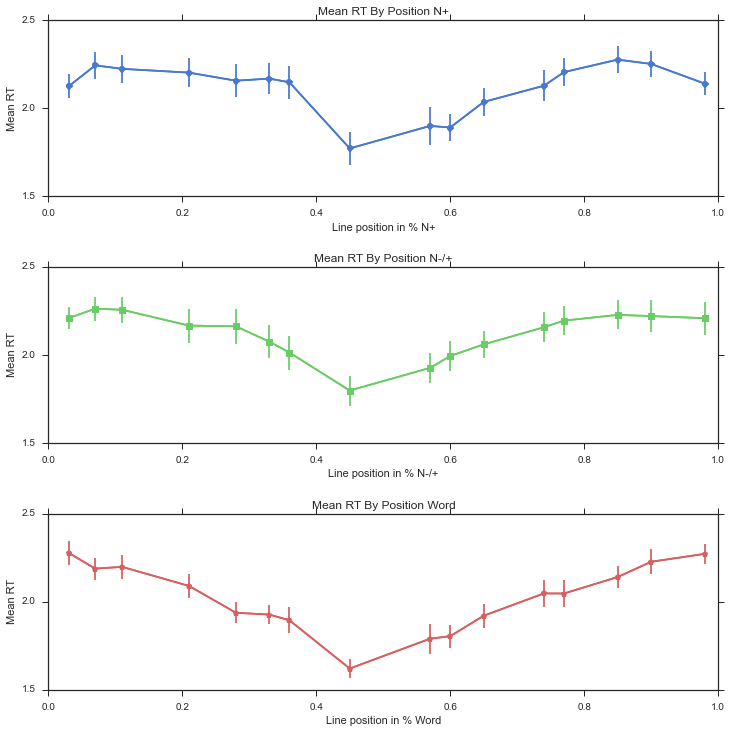

In [83]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, rts_1, 'o-', color=pal[0])
fig1.errorbar(xvals, rts_1, yerr=rts_se_1*1.96)
plt.title('Mean RT By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, rts_2, color=pal[1], marker='s')
fig2.errorbar(xvals, rts_2, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT By Position N-/+')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, rts_3, color=pal[2], marker='p')
fig3.errorbar(xvals, rts_3, yerr=rts_se_3*1.96, color=pal[2])
plt.title('Mean RT By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

plt.subplots_adjust(hspace=.4)

In [84]:
rts_1corr = [rts_1[i] - rts_3[i] for i in range(0,len(rts_1))]
rts_2corr = [rts_2[i] - rts_3[i] for i in range(0,len(rts_2))]

([<matplotlib.axis.YTick at 0x116625790>,
 <a list of 5 Text yticklabel objects>)

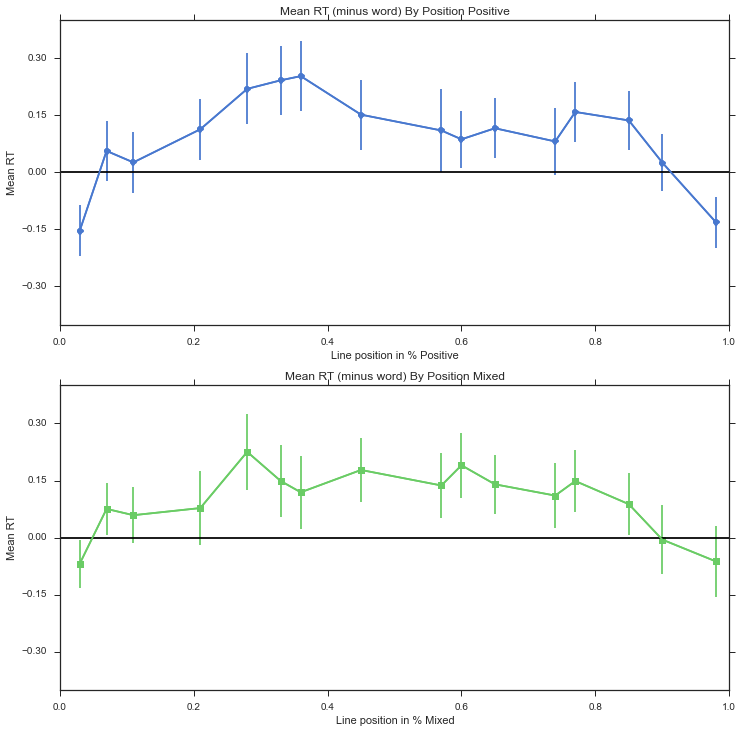

In [85]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(2,1,1)
fig1.plot(xvals, rts_1corr, 'o-', color=pal[0])
fig1.plot([0,1], [0,0], color='black', linestyle='-')
fig1.errorbar(xvals, rts_1corr, yerr=rts_se_1*1.96)
plt.title('Mean RT (minus word) By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

fig2 = plt.subplot(2,1,2)
fig2.plot(xvals, rts_2corr, color=pal[1], marker='s')
fig2.plot([0,1], [0,0], color='black', linestyle='-')
fig2.errorbar(xvals, rts_2corr, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT (minus word) By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

## Error plots

In [86]:
error = position_tasks['AbsError'].mean()
error_std = position_tasks['AbsError'].std()
error_se = error_std/np.sqrt(n_subj)

In [87]:
error_1_med = error.iloc[0:16]
error_2_med = error.iloc[16:32]
error_3_med = error.iloc[32:48]
error_se_1 = error_se.iloc[0:16]
error_se_2 = error_se.iloc[16:32]
error_se_3 = error_se.iloc[32:48]

In [88]:
len(D[1].keys())

16

In [89]:
error_1 = []
error_2 = []
error_3 = []
for stim in np.sort(D[1].keys()):
    error_1 .append(D[1][stim]['meanError'])
for stim in np.sort(D[2].keys()):
    error_2 .append(D[2][stim]['meanError'])
for stim in np.sort(D[3].keys()):
    error_3 .append(D[3][stim]['meanError'])

In [90]:
error_1

[0.014635426214647609,
 0.02007475420822559,
 0.024450054561931608,
 0.032463756732693645,
 0.034593302392552053,
 0.039093125429669168,
 0.048369538548290528,
 0.019768645387062453,
 0.02242190952079896,
 0.021515611004553205,
 0.03316846360027767,
 0.024989589667113895,
 0.02629917315196276,
 0.027485433538684163,
 0.020662789347489934,
 0.010896218585017999]

In [91]:
error_1_med = error_1_med.get_values()
error_2_med = error_2_med.get_values()
error_3_med = error_3_med.get_values()

## PAE by position (median across subjects)

Error bars would go down dramatically removing S_04208 you can see that in boxplots in replication_plot notebook

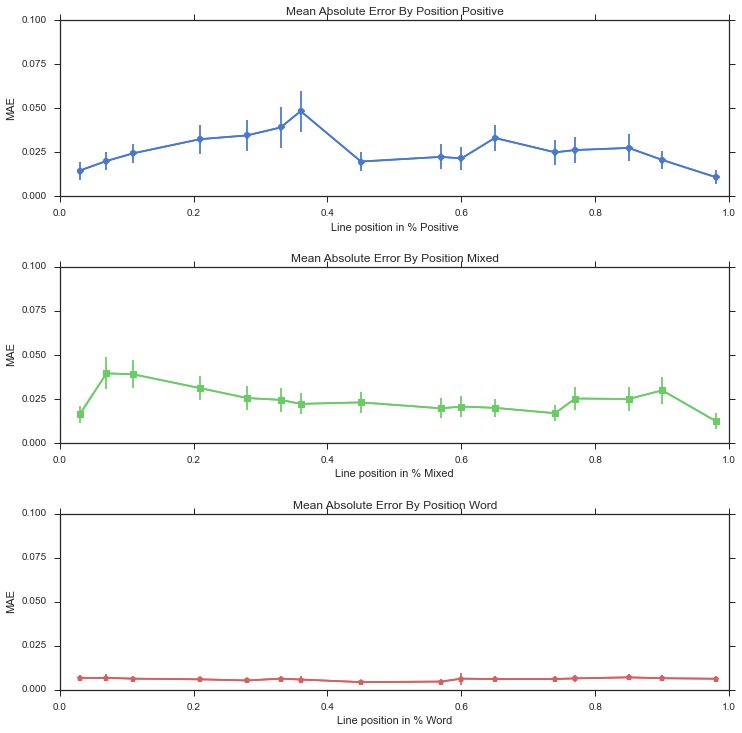

In [92]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, error_1, 'o-', color=pal[0])
fig1.errorbar(xvals, error_1, yerr=error_se_1*1.96, color=pal[0])
plt.title('Mean Absolute Error By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, error_2, color=pal[1], marker='s')
fig2.errorbar(xvals, error_2, yerr=error_se_2*1.96, color=pal[1])
plt.title('Mean Absolute Error By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, error_3, color=pal[2], marker='p')
fig3.errorbar(xvals, error_3, yerr=error_se_3*1.96, color=pal[2])
plt.title('Mean Absolute Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

plt.subplots_adjust(hspace=.4)

next code is doing the average for each subject first and then taking the standard deviation

In [93]:
error_std_1 = []
error_std_2 = []
error_std_3 = []
for stim in np.sort(D[1].keys()):
    error_std_1.append(D[1][stim]['stdError'])
for stim in np.sort(D[2].keys()):
    error_std_2.append(D[2][stim]['stdError'])
for stim in np.sort(D[3].keys()):
    error_std_3.append(D[3][stim]['stdError'])

In [94]:
error_se1_med = error_std_1/np.sqrt(n_subj)
error_se2_med = error_std_2/np.sqrt(n_subj)
error_se3_med = error_std_3/np.sqrt(n_subj)

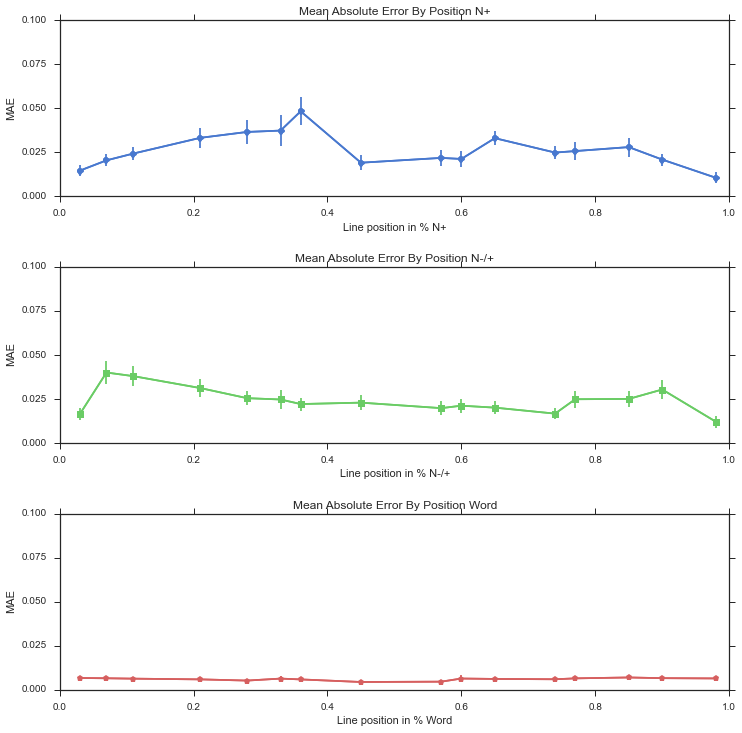

In [95]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, error_1_med, 'o-', color=pal[0])
fig1.errorbar(xvals, error_1_med, yerr=error_se1_med*1.96, color=pal[0])
plt.title('Mean Absolute Error By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, error_2_med, color=pal[1], marker='s')
fig2.errorbar(xvals, error_2_med, yerr=error_se2_med*1.96, color=pal[1])
plt.title('Mean Absolute Error By Position N-/+')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075, 0.1]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, error_3_med, color=pal[2], marker='p')
fig3.errorbar(xvals, error_3_med, yerr=error_se3_med*1.96, color=pal[2])
plt.title('Mean Absolute Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

plt.subplots_adjust(hspace=.4)

## Signed error is calculated as Response - Correct

In [96]:
signerror_1 = []
signerror_2 = []
signerror_3 = []
for stim in np.sort(D[1].keys()):
    signerror_1.append(D[1][stim]['sign_error_mean'])
for stim in np.sort(D[2].keys()):
    signerror_2.append(D[2][stim]['sign_error_mean'])
for stim in np.sort(D[3].keys()):
    signerror_3.append(D[3][stim]['sign_error_mean'])

In [97]:
SD_signerror_1 = []
SD_signerror_2 = []
SD_signerror_3 = []
for stim in np.sort(D[1].keys()):
    SD_signerror_1.append(D[1][stim]['sign_error_SD'])
for stim in np.sort(D[2].keys()):
    SD_signerror_2.append(D[2][stim]['sign_error_SD'])
for stim in np.sort(D[3].keys()):
    SD_signerror_3.append(D[3][stim]['sign_error_SD'])

In [98]:
SE_signerror_1 = SD_signerror_1/np.sqrt(n_subj)
SE_signerror_2 = SD_signerror_2/np.sqrt(n_subj)
SE_signerror_3 = SD_signerror_3/np.sqrt(n_subj)

In [99]:
SD_1 = []
SD_2 = []
SD_3 = []
for stim in np.sort(D[1].keys()):
    SD_1.append(D[1][stim]['SD_mean'])
for stim in np.sort(D[2].keys()):
    SD_2.append(D[2][stim]['SD_mean'])
for stim in np.sort(D[3].keys()):
    SD_3.append(D[3][stim]['SD_mean'])

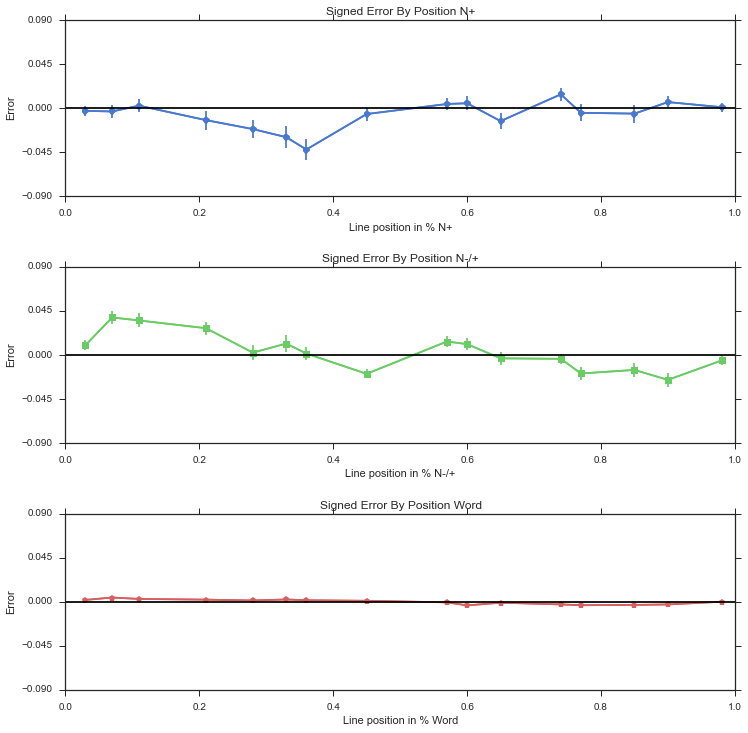

In [100]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, signerror_1, 'o-', color=pal[0])
fig1.errorbar(xvals, signerror_1, yerr=SE_signerror_1*1.96, color=pal[0])
fig1.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, signerror_2, color=pal[1], marker='s')
fig2.errorbar(xvals, signerror_2, yerr=SE_signerror_2*1.96, color=pal[1])
fig2.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position N-/+')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, signerror_3, color=pal[2], marker='p')
fig3.errorbar(xvals, signerror_3, yerr=SE_signerror_3*1.96, color=pal[2])
fig3.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

plt.subplots_adjust(hspace=.4)

 Positive values in the graph above mean participant overestimated, negative values mean participant underestimated. In the -/+ task participants tend to give answers further from the endpoints than they should (This might have to do with the fact that the line is divided in 200 units unlike + task).

Signed error plot with standard error calculated by first taking the mean of 3 estimates per subject and then taking std across different subjects

## SD calculated as std of each subject and then averaging the individual std

### Only 3 datapoints per position per subject so estimate will have a lot of varriability

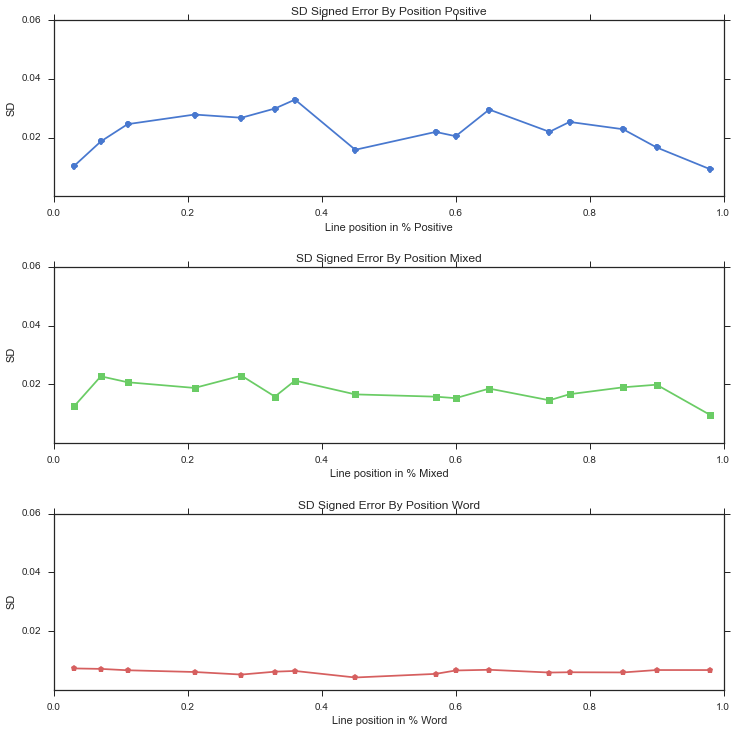

In [101]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, SD_1, 'o-', color=pal[0])
plt.title('SD Signed Error By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.05])
plt.yticks(([0.02,0.04,0.06]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, SD_2, color=pal[1], marker='s')
plt.title('SD Signed Error By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.05])
plt.yticks(([0.02,0.04,0.06]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, SD_3, color=pal[2], marker='p')
plt.title('SD Signed Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.05])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

## Correlate PAE Vs Landmark Distance

### Distance from 0

In [102]:
dist_0 = xvals
dist_0

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

### Distance from 50

In [103]:
dist_50 = abs(xvals-0.5)
dist_50

array([ 0.47,  0.43,  0.39,  0.29,  0.22,  0.17,  0.14,  0.05,  0.07,
        0.1 ,  0.15,  0.24,  0.27,  0.35,  0.4 ,  0.48])

### Distance from 100

In [104]:
dist_100 = abs(xvals - 1)
dist_100

array([ 0.97,  0.93,  0.89,  0.79,  0.72,  0.67,  0.64,  0.55,  0.43,
        0.4 ,  0.35,  0.26,  0.23,  0.15,  0.1 ,  0.02])

### Distance from Landmark

In [105]:
dist_Land = pd.DataFrame([dist_0, dist_50, dist_100]).min()
dist_Land

0     0.03
1     0.07
2     0.11
3     0.21
4     0.22
5     0.17
6     0.14
7     0.05
8     0.07
9     0.10
10    0.15
11    0.24
12    0.23
13    0.15
14    0.10
15    0.02
dtype: float64

## PAE vs Landmark Distane (across subjects)

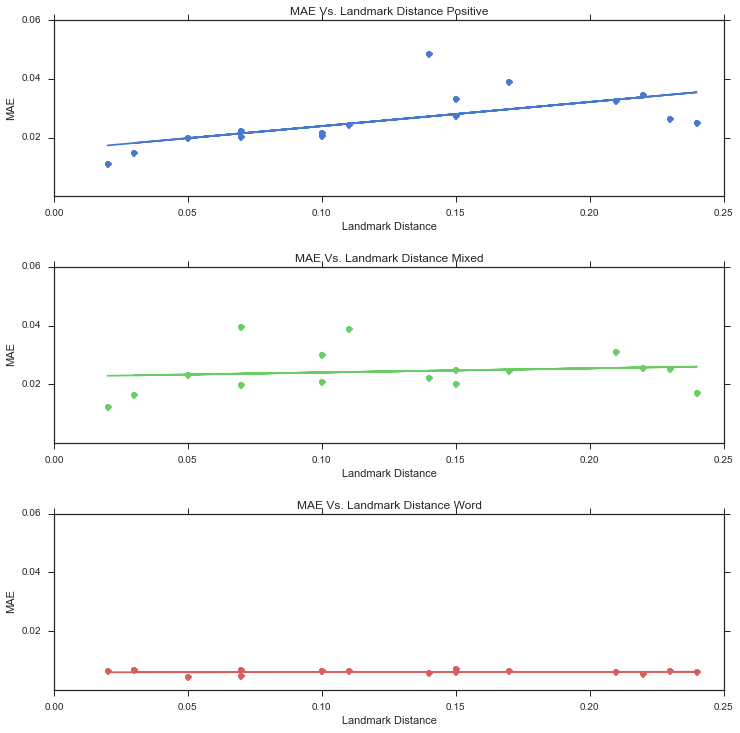

In [106]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land,error_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, error_1, 'o', color=pal[0])
plt.plot(dist_Land, m1*dist_Land + b1, '-', color=pal[0])
plt.title('MAE Vs. Landmark Distance Positive')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land,error_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, error_2, 'o', color=pal[1])
plt.plot(dist_Land, m2*dist_Land + b2, '-', color=pal[1])
plt.title('MAE Vs. Landmark Distance Mixed')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land,error_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, error_3, 'o', color=pal[2])
plt.plot(dist_Land, m3*dist_Land + b3, '-', color=pal[2])
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

### Slope+,  Slope-,  Slopew

In [107]:
print m1, m2, m3

0.0822098966614 0.0140738237914 0.000695514095164


In [108]:
from scipy.stats import linregress
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,error_1)
slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land,error_2)
slope3, intercept3, r3, p3, stderr3 = linregress(dist_Land,error_3)

### r +,  r -,  r w

In [109]:
print 'r1', r1
print 'r2', r2
print 'r3', r3

r1 0.624091082638
r2 0.133965752489
r3 0.0676942208936


### r^2 +,  r^2 -,  r^2 w

In [110]:
print 'r1sq', r1*r1
print 'r2sq', r2*r2
print 'r3sq', r3*r3

r1sq 0.389489679428
r2sq 0.0179468228399
r3sq 0.00458250754239


In [111]:
#print 'slope1', slope1
#print 'slope2', slope2
#print 'slope3', slope3

In [112]:
print 'p1', p1
print 'p2', p2
print 'p3', p3

p1 0.0097700666402
p2 0.620858081958
p3 0.803285762403


## First half only

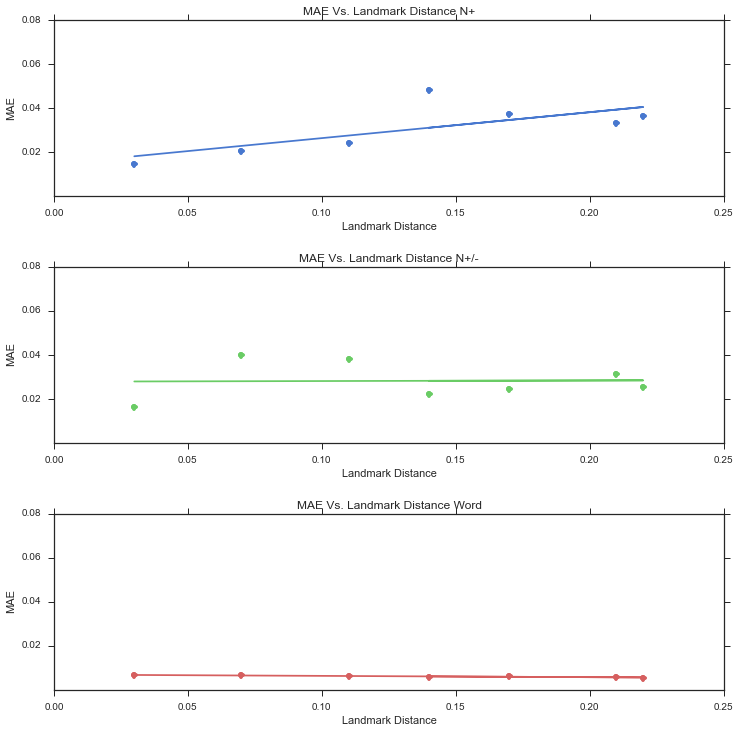

In [113]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land[0:7],error_1_med[0:7],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land[0:7], error_1_med[0:7], 'o', color=pal[0])
plt.plot(dist_Land[0:7], m1*dist_Land[0:7] + b1, '-', color=pal[0])
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.08])
plt.yticks(([0.02,0.04,0.06, 0.08]))

m2, b2 = np.polyfit(dist_Land[0:7],error_2_med[0:7],1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land[0:7], error_2_med[0:7], 'o', color=pal[1])
plt.plot(dist_Land[0:7], m2*dist_Land[0:7] + b2, '-', color=pal[1])
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.08])
plt.yticks(([0.02,0.04,0.06,0.08]))

m3, b3 = np.polyfit(dist_Land[0:7],error_3_med[0:7],1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land[0:7], error_3_med[0:7], 'o', color=pal[2])
plt.plot(dist_Land[0:7], m3*dist_Land[0:7] + b3, '-', color=pal[2])
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.08])
plt.yticks(([0.02,0.04,0.06,0.08]))

plt.subplots_adjust(hspace=.4)

## Second half only

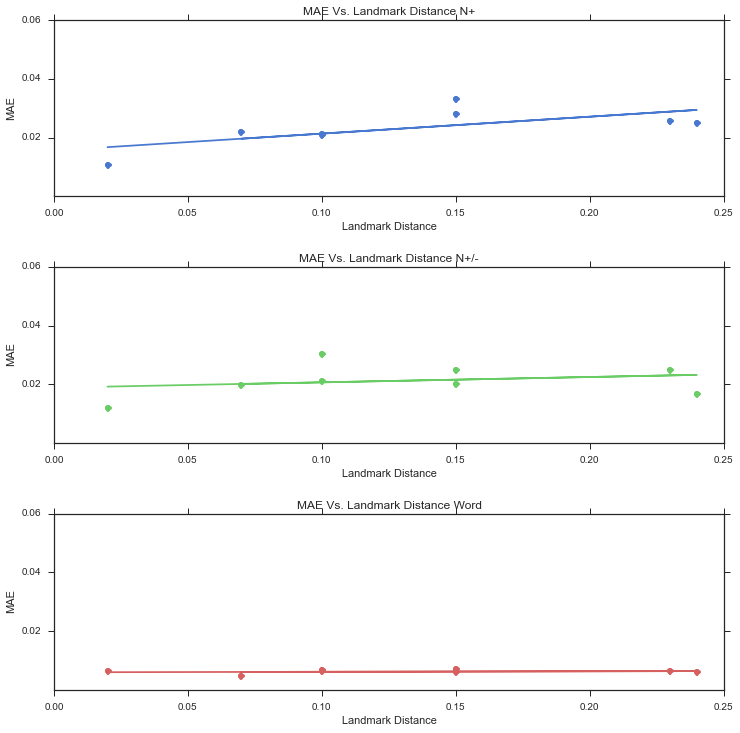

In [114]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land[8:],error_1_med[8:],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land[8:], error_1_med[8:], 'o', color=pal[0])
plt.plot(dist_Land[8:], m1*dist_Land[8:] + b1, '-', color=pal[0])
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land[8:],error_2_med[8:],1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land[8:], error_2_med[8:], 'o', color=pal[1])
plt.plot(dist_Land[8:], m2*dist_Land[8:] + b2, '-', color=pal[1])
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land[8:],error_3_med[8:],1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land[8:], error_3_med[8:], 'o', color=pal[2])
plt.plot(dist_Land[8:], m3*dist_Land[8:] + b3, '-', color=pal[2])
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

## Landmark Distance Vs. SD Error

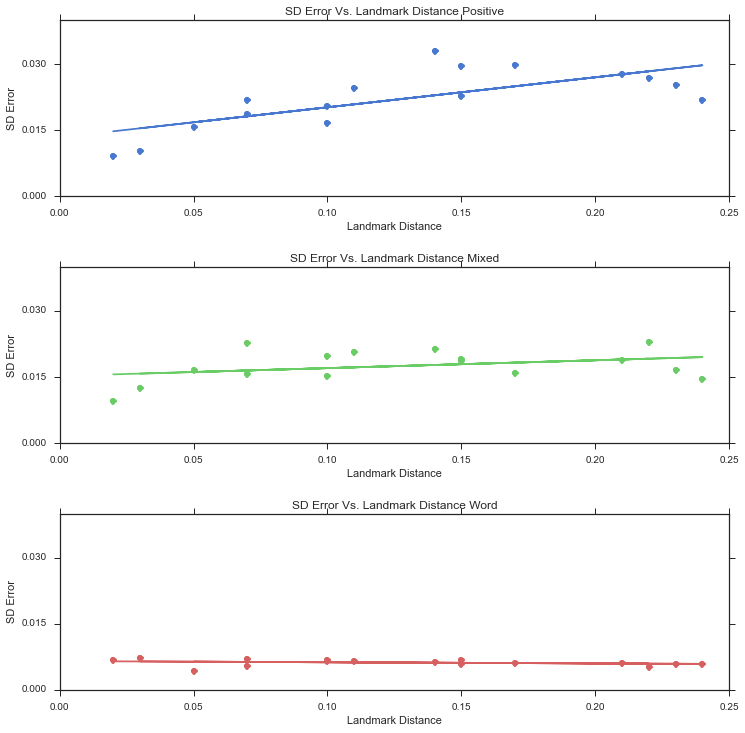

In [115]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land,SD_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, SD_1, 'o', color=pal[0])
plt.plot(dist_Land, m1*dist_Land + b1, '-', color=pal[0])
plt.title('SD Error Vs. Landmark Distance Positive')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

m2, b2 = np.polyfit(dist_Land,SD_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, SD_2, 'o', color=pal[1])
plt.plot(dist_Land, m2*dist_Land + b2, '-', color=pal[1])
plt.title('SD Error Vs. Landmark Distance Mixed')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

m3, b3 = np.polyfit(dist_Land,SD_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, SD_3, 'o', color=pal[2])
plt.plot(dist_Land, m3*dist_Land + b3, '-', color=pal[2])
plt.title('SD Error Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

plt.subplots_adjust(hspace=.4)

In [116]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [117]:
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,SD_1)
slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land,SD_2)
slope3, intercept3, r3, p3, stderr3 = linregress(dist_Land,SD_3)

In [118]:
print r1,r2,r3

0.718077415139 0.348463464996 -0.238322523662


In [119]:
print p1,p2,p3

0.00173117512206 0.185933610414 0.374073991569


## Estimation slope vs SAT scores

In [120]:
del nline_df['MouseTrack']

In [121]:
nline_df.to_csv('nline_data_rep.csv', sep='\t')

In [122]:
new_df = pd.read_csv('nline_data_rep.csv',sep='\t')

In [123]:
len(new_df)

6912

In [124]:
new_df.loc[:,:]= new_df[new_df['catch']<1]
#len(nline_miss)
new_df['Missed'] = new_df['Error']
new_df.loc[new_df['Missed']<1,'Missed'] = 0
#Pick only responded trials
new_df.loc[:,:] = new_df[new_df['Missed']==0]

In [125]:
new_df = new_df[pd.notnull(new_df['Subject'])]

In [126]:
new_df['AbsError'] = np.abs(new_df['Error'])

In [127]:
new_df['BigError'] = 0
new_df.loc[new_df['AbsError']>0.15,'BigError'] = 1
new_df['BigError'].sum()

61

In [128]:
new_df['Dist0'] = new_df['Line_pct']

In [129]:
new_df['Dist50'] = abs(new_df['Dist0']-0.5)

In [130]:
new_df['Dist100'] = abs(new_df['Dist0']-1)

In [131]:
new_df['DistLand'] = new_df.loc[:,['Dist0', 'Dist50', 'Dist100']].min(axis=1)

In [132]:
group_task = new_df.groupby(['Subject','Task','Line_pct'])

In [133]:
#group_task.groups

In [134]:
#group_task.get_group(('s_02003',1,0.98))['Error'].mean()

In [135]:
error = group_task['Error'].mean()
response = group_task['Response'].mean()

In [136]:
response.loc['s_04203'].loc[1]

Line_pct
0.03    0.080853
0.07    0.067174
0.11    0.094584
0.21    0.202661
0.28    0.278293
0.33    0.291487
0.36    0.316725
0.45    0.431972
0.57    0.601719
0.60    0.633318
0.65    0.657497
0.74    0.754417
0.77    0.777140
0.85    0.837365
0.90    0.891962
0.98    0.969941
Name: Response, dtype: float64

In [137]:
response.loc['s_04203'].loc[1].index

Float64Index([0.03, 0.07, 0.11, 0.21, 0.28, 0.33, 0.36, 0.45, 0.57,  0.6, 0.65,
              0.74, 0.77, 0.85,  0.9, 0.98],
             dtype='float64', name=u'Line_pct')

In [138]:
subjs = new_df['Subject'].unique()
tasks = new_df['Task'].unique()

In [139]:
tasks

array([ 3.,  1.,  2.])

In [140]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0
error_dict = {}
position_dict = {}
results_list = []
for s in subjs:
    error_dict[s] = {}
    position_dict[s] = {}
    for t in tasks:
        d_tmp = {}
        error_dict[s][t] = error.loc[s].loc[t]
        position_dict[s][t] = response.loc[s].loc[t]
        slope,inter,r,p,stderr = linregress(error_dict[s][t].index, error_dict[s][t])
        slope2,inter2,r2,p2,stderr2 = linregress(position_dict[s][t].index, position_dict[s][t])
        d_tmp = {'Subject':s, 'Task':t, 'slope_E':slope, 'slope_P':slope2, 'int_E':inter,
                 'int_P':inter2,'r_E':r, 'r_P':r2, 'p_E':p, 'p_P':p2, 'stderr_E':stderr,
                 'stderr_P':stderr2, 'R2_E':r*r, 'R2_P':r2*r2}
        results_list.append(d_tmp)
res_df = pd.DataFrame(results_list)      

/Users/frankanayet/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:1323: FutureWarning: scalar indexers for index type MultiIndex should be integers and not floating point
  key = self._convert_scalar_indexer(key, axis)


## Histogram slope subject estimates Task +

(0, 18)

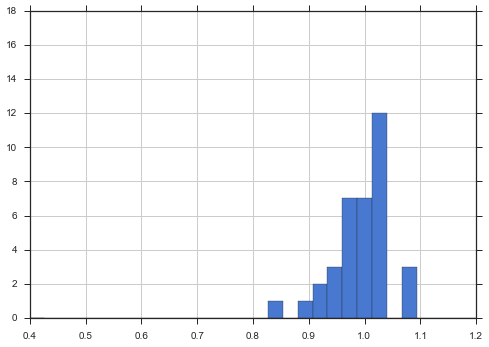

In [141]:
res_df['slope_P'][res_df['Task']==1].hist(bins=30, range=[0.4,1.2])
plt.ylim([0,18])

##From above (in the missing trial analysis)
S_04116 seems to have not understood the word task ** Also slope of estimates for N+ (see way below) is 0.4 really far off from a slope close to 1 li the rest of subjects
S_04208 has highest misses of my batch and also has a 0,48 slope(see way below)
S_04117 has 37 missed trials and also has 0.78 slope (see way below)
S_04104 has 37 missed trials but slope in normal range

## Histogram slope subject estimates Task -

(0, 18)

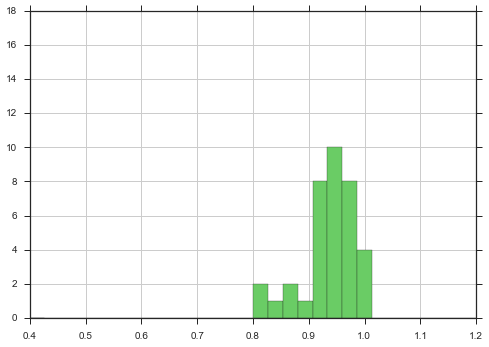

In [142]:
res_df['slope_P'][res_df['Task']==2].hist(bins=30, range=[0.4,1.2],color=pal[1])
plt.ylim([0,18])

## Histogram slope subject estimates Task w

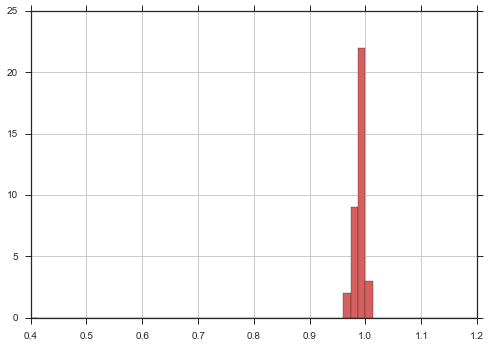

In [143]:
res_df['slope_P'][res_df['Task']==3].hist(bins=60, range=[0.4,1.2],color=pal[2])

In [144]:
math = pd.read_csv('MathScores.csv')

In [145]:
res_df = pd.merge(res_df,math,on='Subject',how='inner')

In [146]:
#res_df[['Subject','slope_P', 'Math_Score']][res_df['Task']==1]

In [147]:
#slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_E'][res_df['Task']==1]),
#                                                 res_df['Math_Score'][res_df['Task']==1])
#plt.plot(abs(res_df['slope_E'][res_df['Task']==1]),res_df['Math_Score'][res_df['Task']==1], 'o')
#plt.plot(abs(res_df['slope_E'][res_df['Task']==1]), slope1*abs(res_df['slope_E'][res_df['Task']==1]) + intercept1, 'b-')

In [148]:
#print r1, r1*r1, p

##  Deviation from Linearity Vs. Math Score

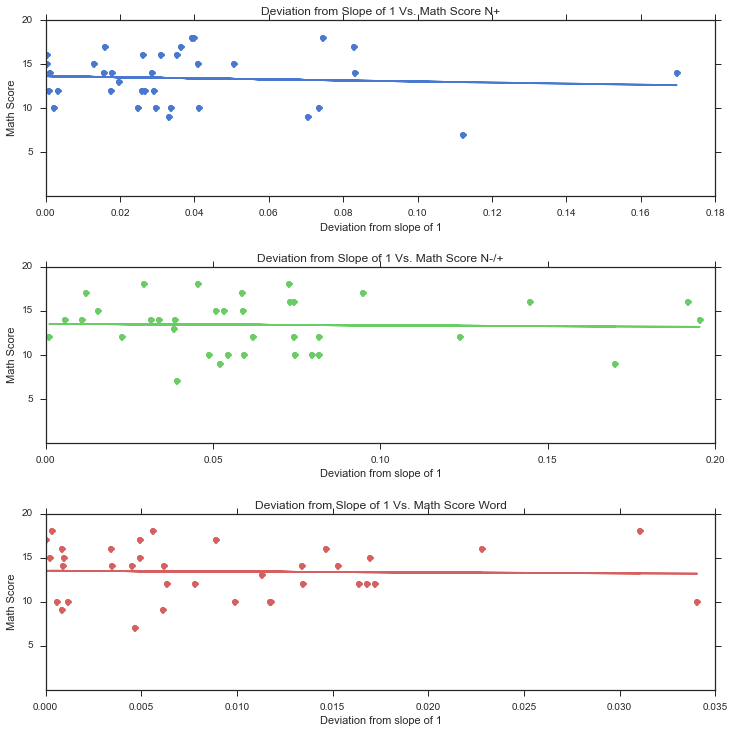

In [149]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==1] -1),
                    res_df['Math_Score'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==1] -1),
          res_df['Math_Score'][res_df['Task']==1], 'o', color=pal[0])
plt.plot(abs(res_df['slope_P'][res_df['Task']==1] -1), 
         m1*abs(res_df['slope_P'][res_df['Task']==1] -1) + b1, '-', color=pal[0])
plt.title('Deviation from Slope of 1 Vs. Math Score N+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==2] -1),
                    res_df['Math_Score'][res_df['Task']==2],1)
#fig = plt.figure(figsize=(12,12))
fig2 = plt.subplot(3,1,2)
fig2.plot(abs(res_df['slope_P'][res_df['Task']==2] -1),
          res_df['Math_Score'][res_df['Task']==2], 'o', color=pal[1])
plt.plot(abs(res_df['slope_P'][res_df['Task']==2] -1), 
         m2*abs(res_df['slope_P'][res_df['Task']==2] -1) + b2, '-', color=pal[1])
plt.title('Deviation from Slope of 1 Vs. Math Score N-/+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

#handle nan
idx = np.isfinite(abs(res_df['slope_P'][res_df['Task']==3] -1)) & np.isfinite(res_df['Math_Score'][res_df['Task']==3])
m3, b3 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==3][idx] -1),
                    res_df['Math_Score'][res_df['Task']==3][idx],1)
#fig = plt.figure(figsize=(12,12))
fig3 = plt.subplot(3,1,3)
fig3.plot(abs(res_df['slope_P'][res_df['Task']==3] -1),
          res_df['Math_Score'][res_df['Task']==3], 'o', color=pal[2])
plt.plot(abs(res_df['slope_P'][res_df['Task']==3] -1), 
         m3*abs(res_df['slope_P'][res_df['Task']==3] -1) + b3, '-', color=pal[2])
plt.title('Deviation from Slope of 1 Vs. Math Score Word')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.subplots_adjust(hspace=.4)

In [150]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [151]:
slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_P'][res_df['Task']==1]-1),
                                                 res_df['Math_Score'][res_df['Task']==1])
slope2, intercept2, r2, p2, stderr2 = linregress(abs(res_df['slope_P'][res_df['Task']==2]-1),
                                                 res_df['Math_Score'][res_df['Task']==2])
slope3, intercept3, r3, p3, stderr3 = linregress(abs(res_df['slope_P'][res_df['Task']==3]-1),
                                                 res_df['Math_Score'][res_df['Task']==3])

### r +, r -, r w

In [152]:
print r1, r2, r3

-0.0715037960118 -0.028543311676 -0.0270639990516


### R^2 +, R^2 -, R^2 w

In [153]:
print r1*r1, r2*r2, r3*r3

0.0051127928441 0.000814720641433 0.000732460044667


### Slope +, Slope -, Slope w

In [154]:
print slope1, slope2, slope3

-6.03896480583 -1.75281323536 -9.45535641077


### p-value +, p-value -, p-value w

In [155]:
print p1, p2, p3

0.678571677774 0.868747758273 0.875495704776


## Slope Vs Intercept

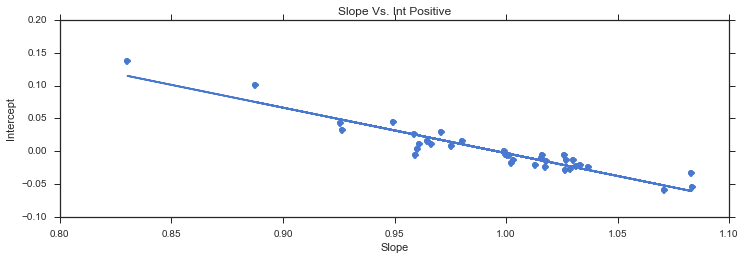

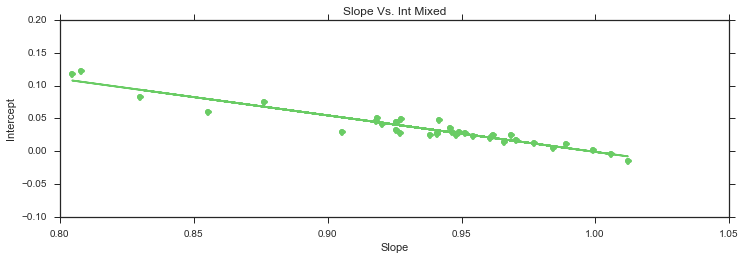

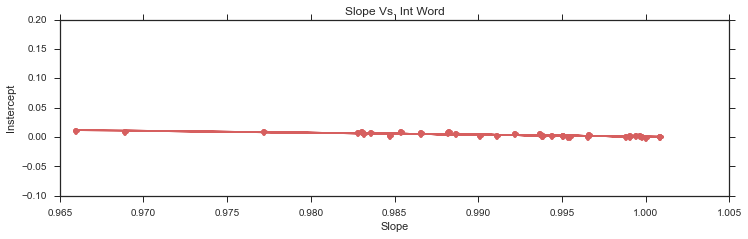

In [156]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(res_df['slope_P'][res_df['Task']==1],
                    res_df['int_P'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(res_df['slope_P'][res_df['Task']==1],
          res_df['int_P'][res_df['Task']==1], 'o', color=pal[0])
plt.plot(res_df['slope_P'][res_df['Task']==1], 
         m1*res_df['slope_P'][res_df['Task']==1] + b1, '-', color=pal[0])
plt.title('Slope Vs. Int Positive')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Intercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))

m2, b2 = np.polyfit(res_df['slope_P'][res_df['Task']==2],
                    res_df['int_P'][res_df['Task']==2],1)
fig = plt.figure(figsize=(12,12))
fig2 = plt.subplot(3,1,2)
fig2.plot(res_df['slope_P'][res_df['Task']==2],
          res_df['int_P'][res_df['Task']==2], 'o', color=pal[1])
plt.plot(res_df['slope_P'][res_df['Task']==2], 
         m2*res_df['slope_P'][res_df['Task']==2] + b2, '-', color=pal[1])
plt.title('Slope Vs. Int Mixed')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Intercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))


m3, b3 = np.polyfit(res_df['slope_P'][res_df['Task']==3],
                    res_df['int_P'][res_df['Task']==3],1)
fig = plt.figure(figsize=(12,12))
fig3 = plt.subplot(3,1,3)
fig3.plot(res_df['slope_P'][res_df['Task']==3],
          res_df['int_P'][res_df['Task']==3], 'o', color=pal[2])
plt.plot(res_df['slope_P'][res_df['Task']==3], 
         m3*res_df['slope_P'][res_df['Task']==3] + b3, '-', color=pal[2])
plt.title('Slope Vs. Int Word')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Instercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))
plt.subplots_adjust(hspace=.4)

## Scatter plots for individual subjects

In [157]:
new_math_df = pd.merge(new_df,math,on='Subject',how='inner')

In [158]:
ordered = res_df[['Subject', 'Math_Score']][res_df['Task']==1]
ordered_math = ordered.sort_values(by='Math_Score', ascending=False)

In [159]:
table_order = ordered_math.Subject

In [160]:
#sns.set_palette('muted')
#sns.set_style('ticks')
#g = sns.FacetGrid(new_math_df[new_math_df['Task']==1], col='Subject', col_wrap=3, xlim=(0,1),
#                  ylim=(0,1), col_order=ordered_math['Subject'], size=4, aspect=1.2)
#g = g.map(sns.regplot, 'Line_pct', 'Response', scatter_kws={'s':80, 'marker':'+'})
#ctr = 0
#for ax in g.axes.flat:
#    ax.set_title(ordered_math.iloc[ctr]['Math_Score'])
#    ctr = ctr + 1

# Positive Task

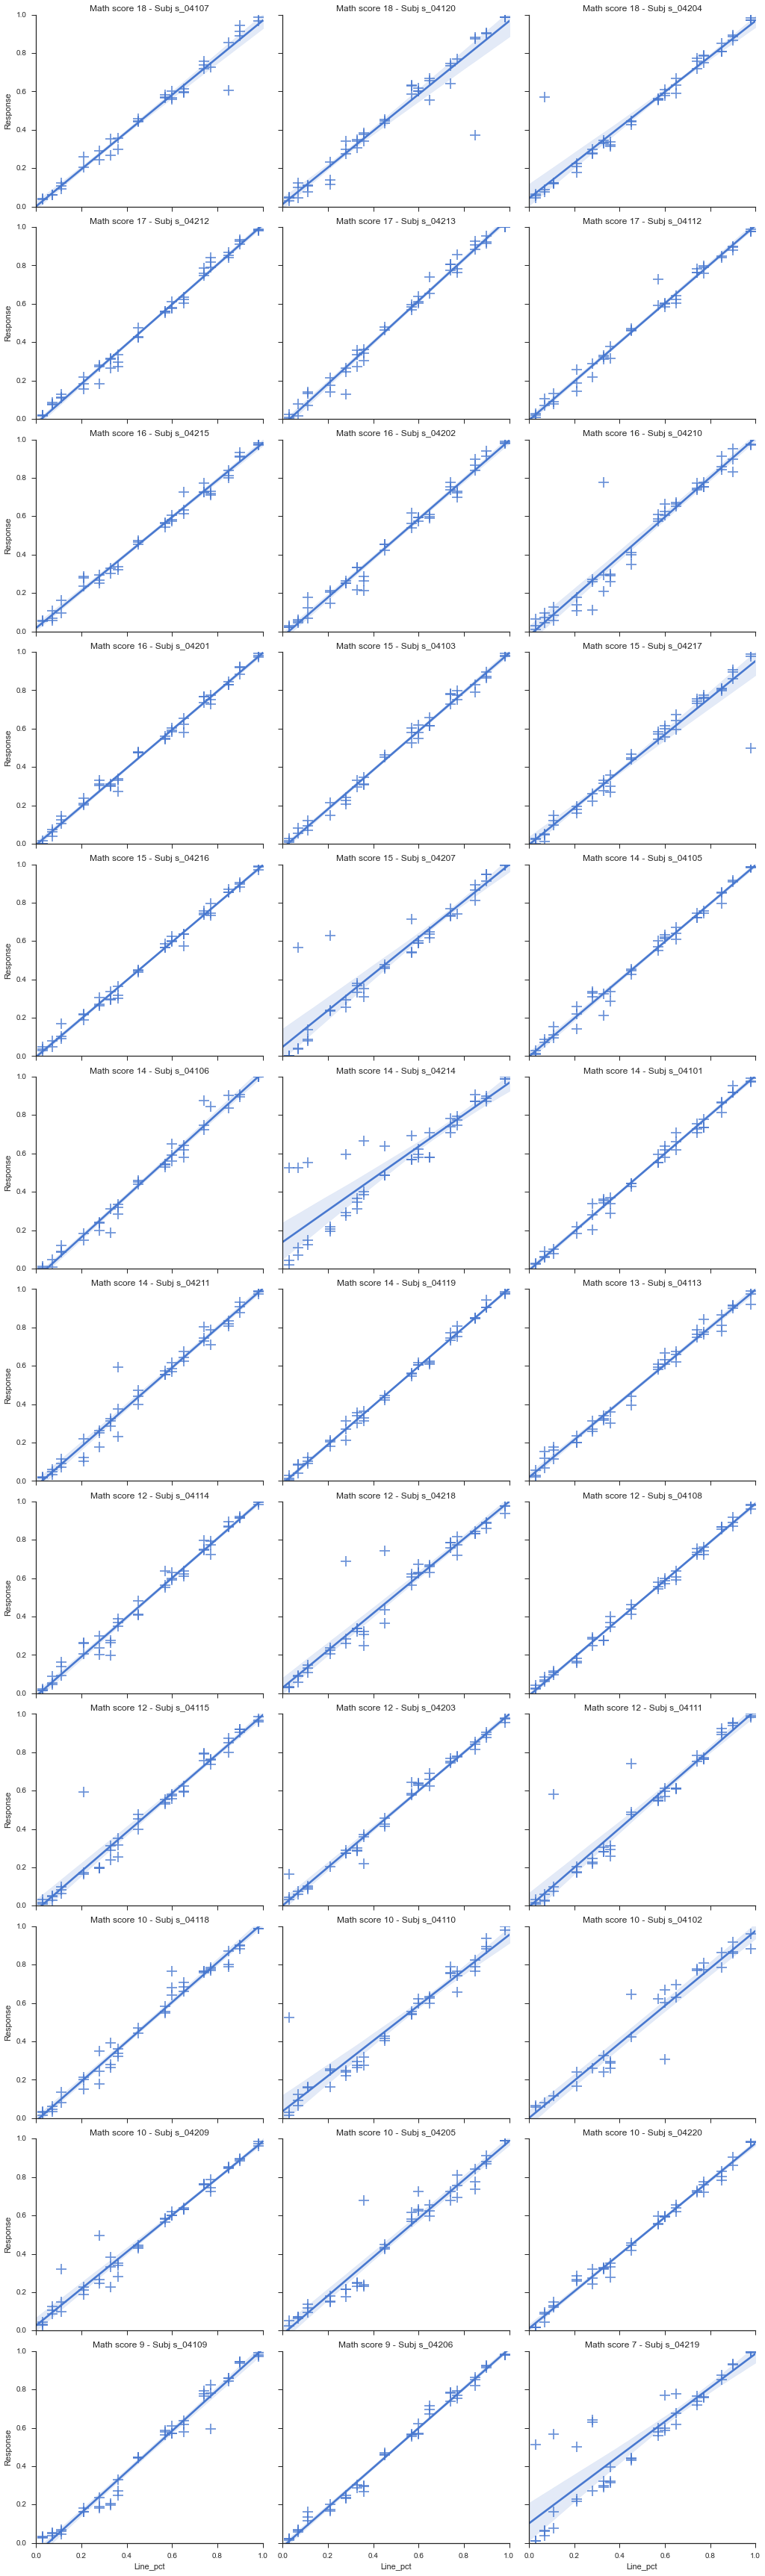

In [161]:
#sns.set_palette('BuGn_r')
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==1],markers=['+'],
               col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200, 'color':pal[0]},
              line_kws={'color':pal[0]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
g.savefig('Scatter_Positive.png')

#  Mixed Task

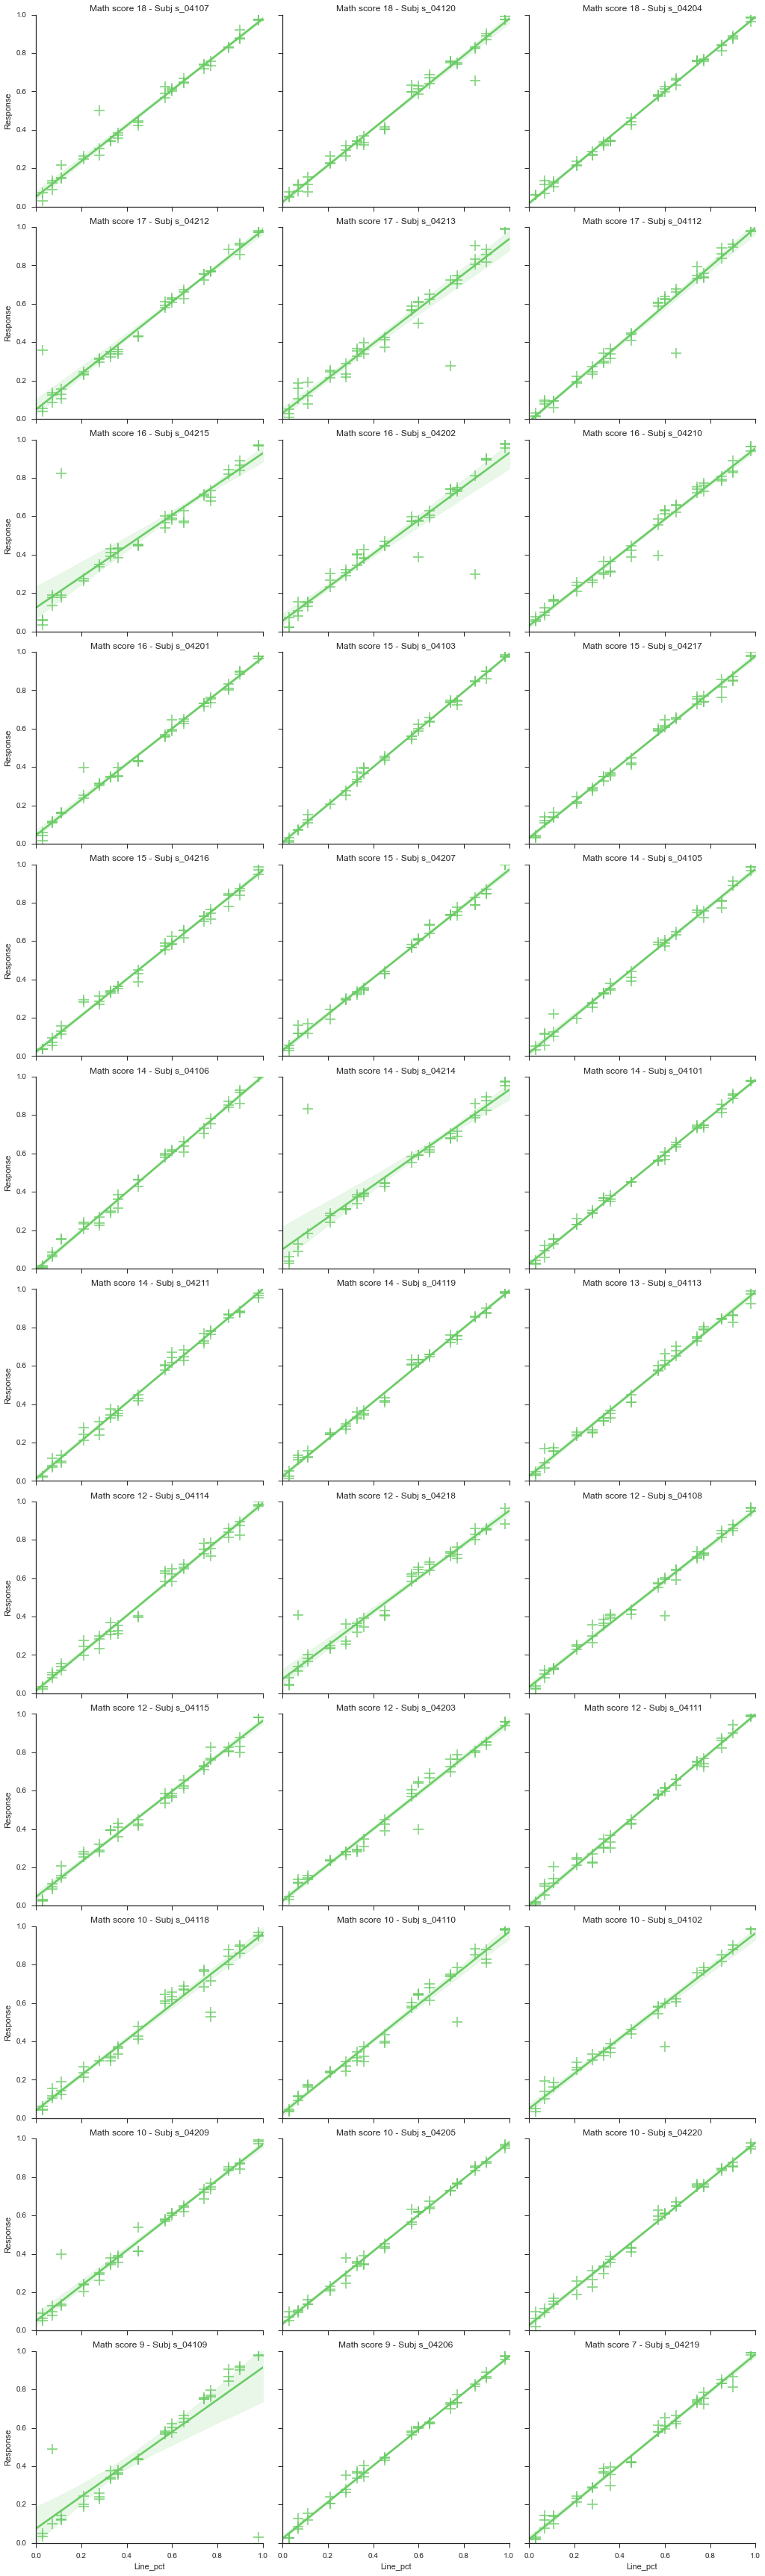

In [162]:
#sns.set_palette('muted')
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==2],
               markers=['+'],col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200,'color':pal[1]},
              line_kws={'color':pal[1]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
g.savefig('Scatter_Negative.png')

# Remove outliers from plots

In [163]:
new_math_outlier = new_math_df[new_math_df['BigError']==0]

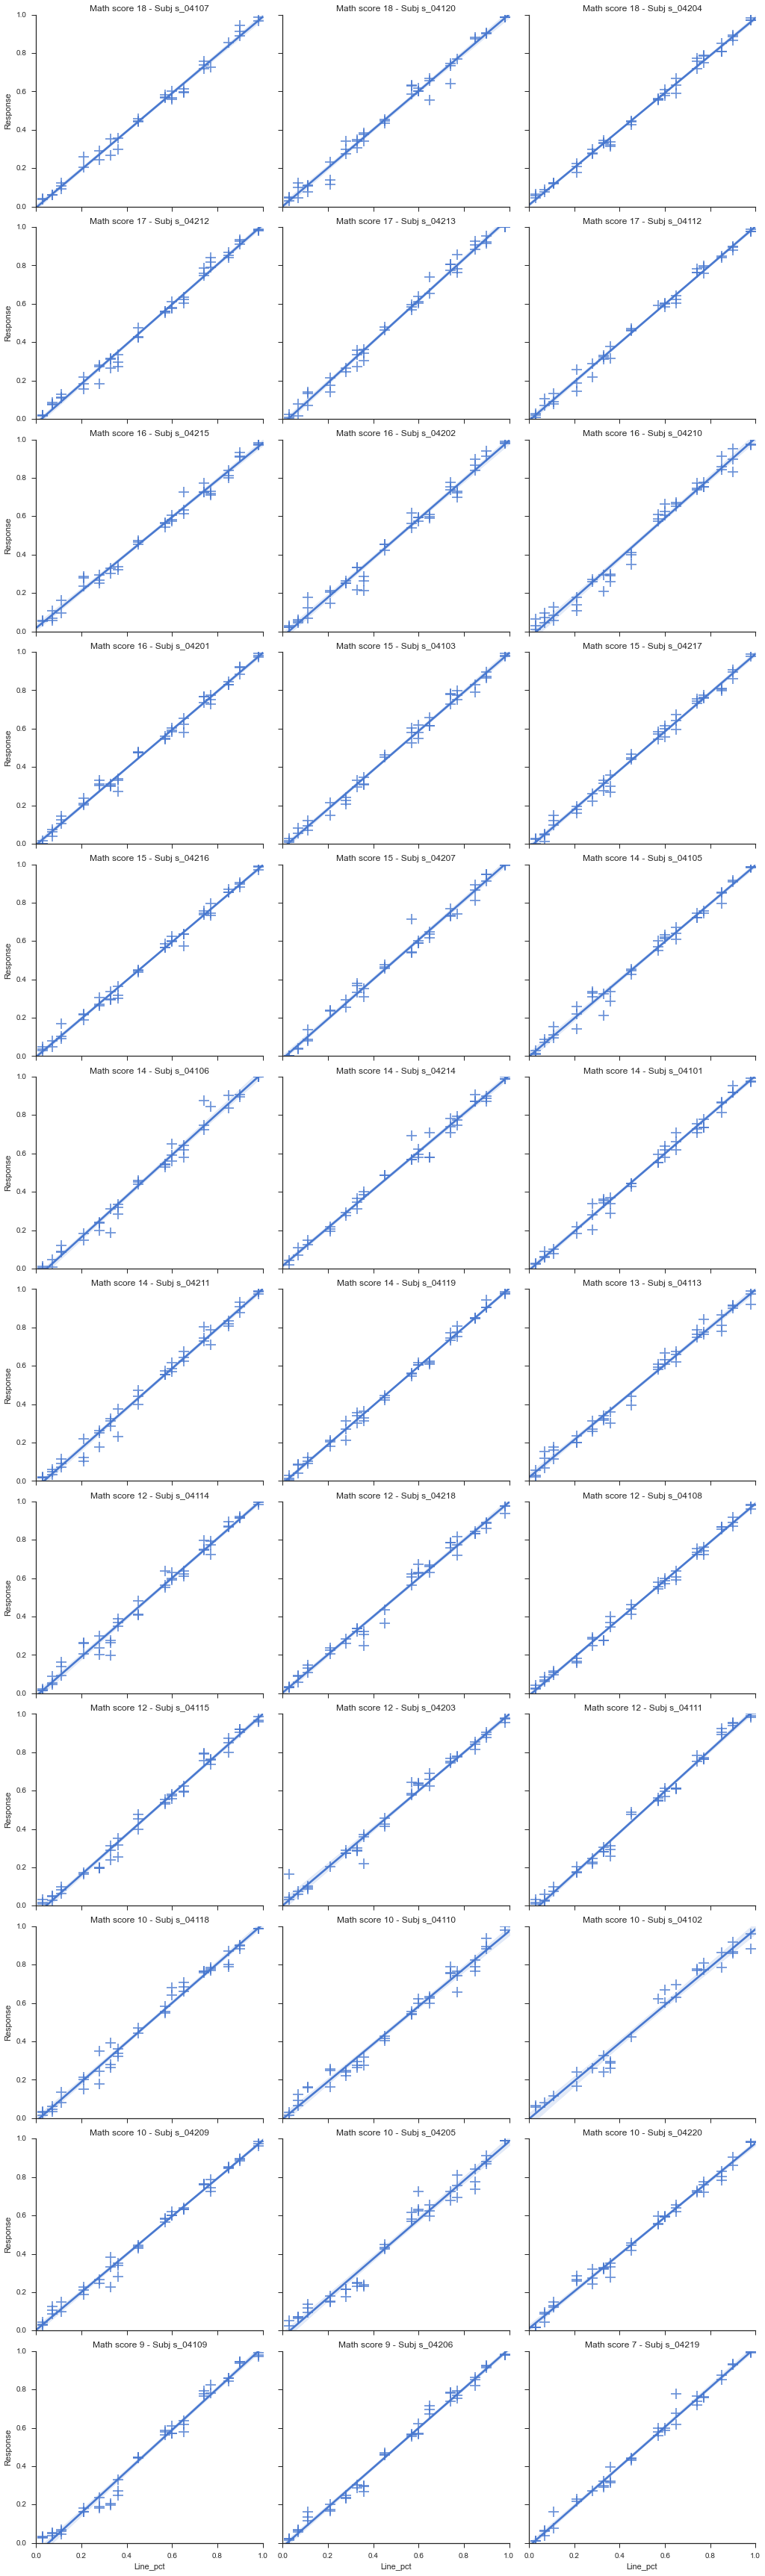

In [164]:
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_outlier[new_math_outlier['Task']==1],markers=['+'],
               col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200, 'color':pal[0]},
              line_kws={'color':pal[0]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
#g.savefig('Scatter_Positive_outliers.png')

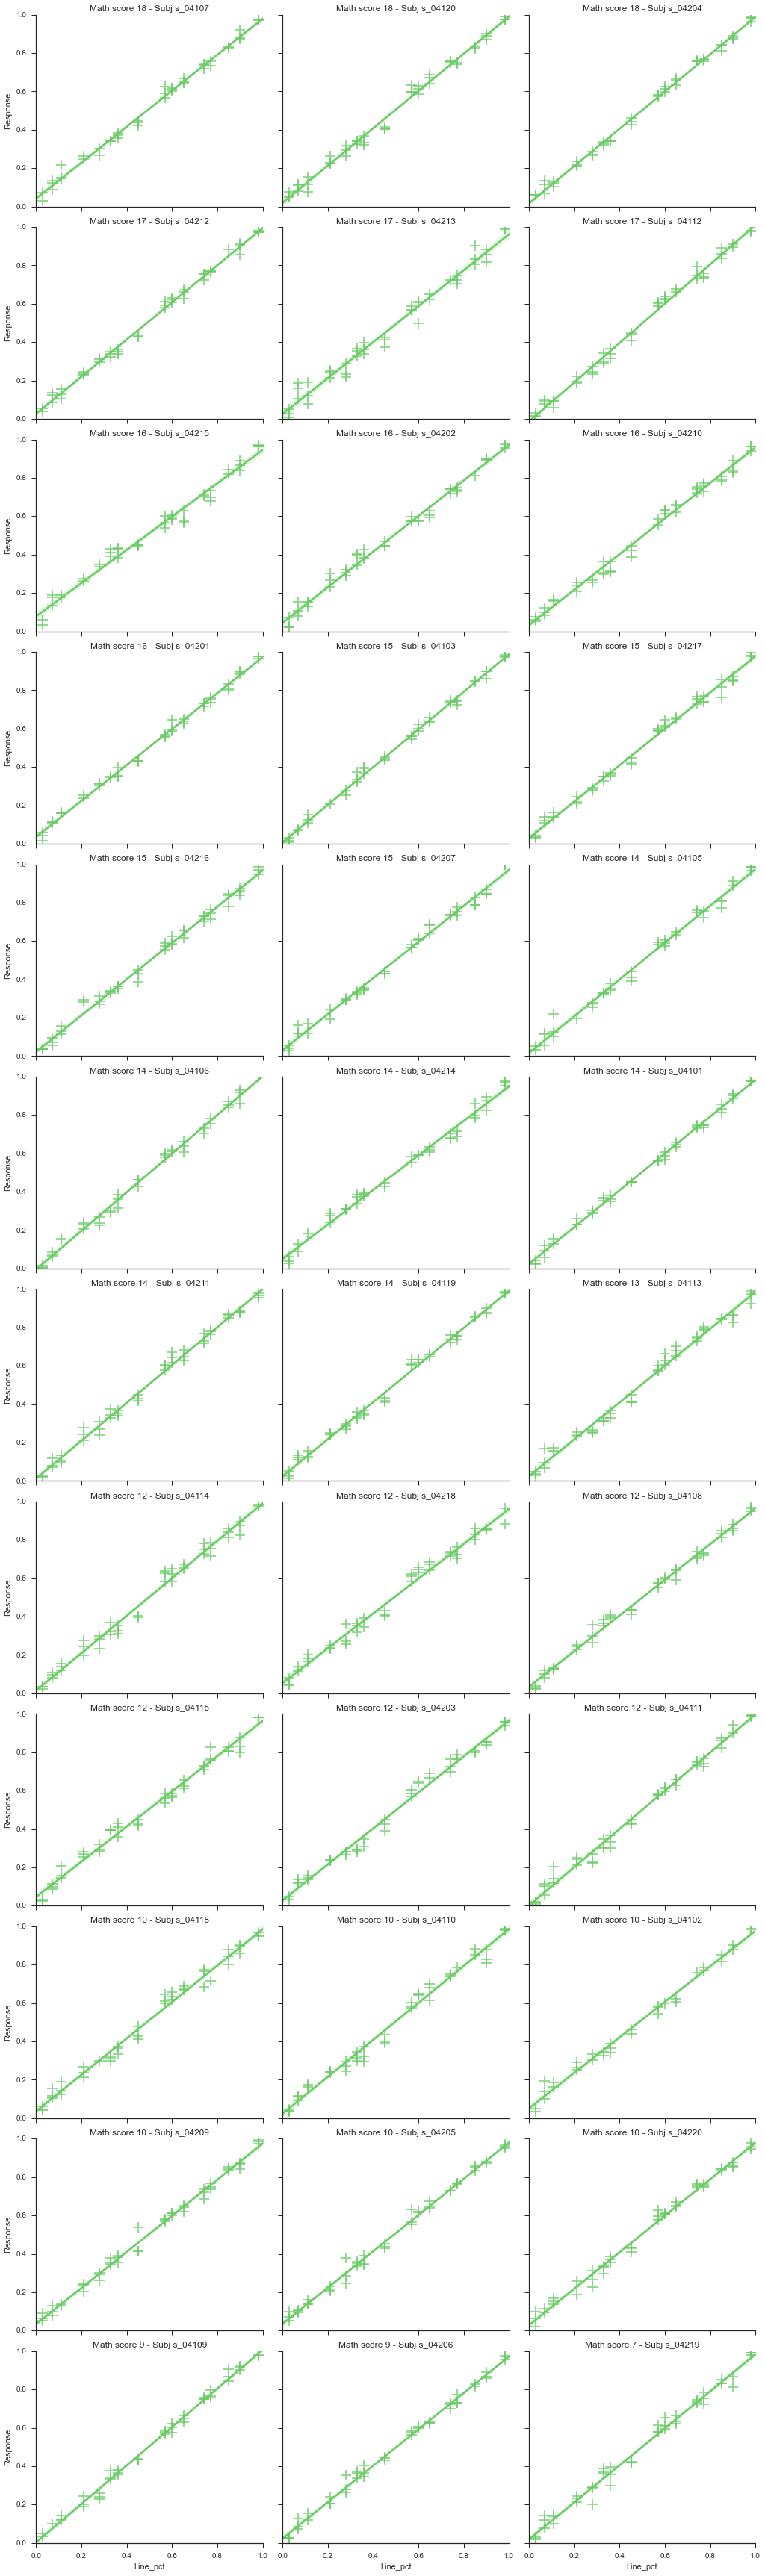

In [165]:
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_outlier[new_math_outlier['Task']==2],
               markers=['+'],col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200,'color':pal[1]},
              line_kws={'color':pal[1]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
#g.savefig('Scatter_Negative_outlier.png')

## Signed Error Vs. Presented Position Positive Task (4th order polynomial fit)

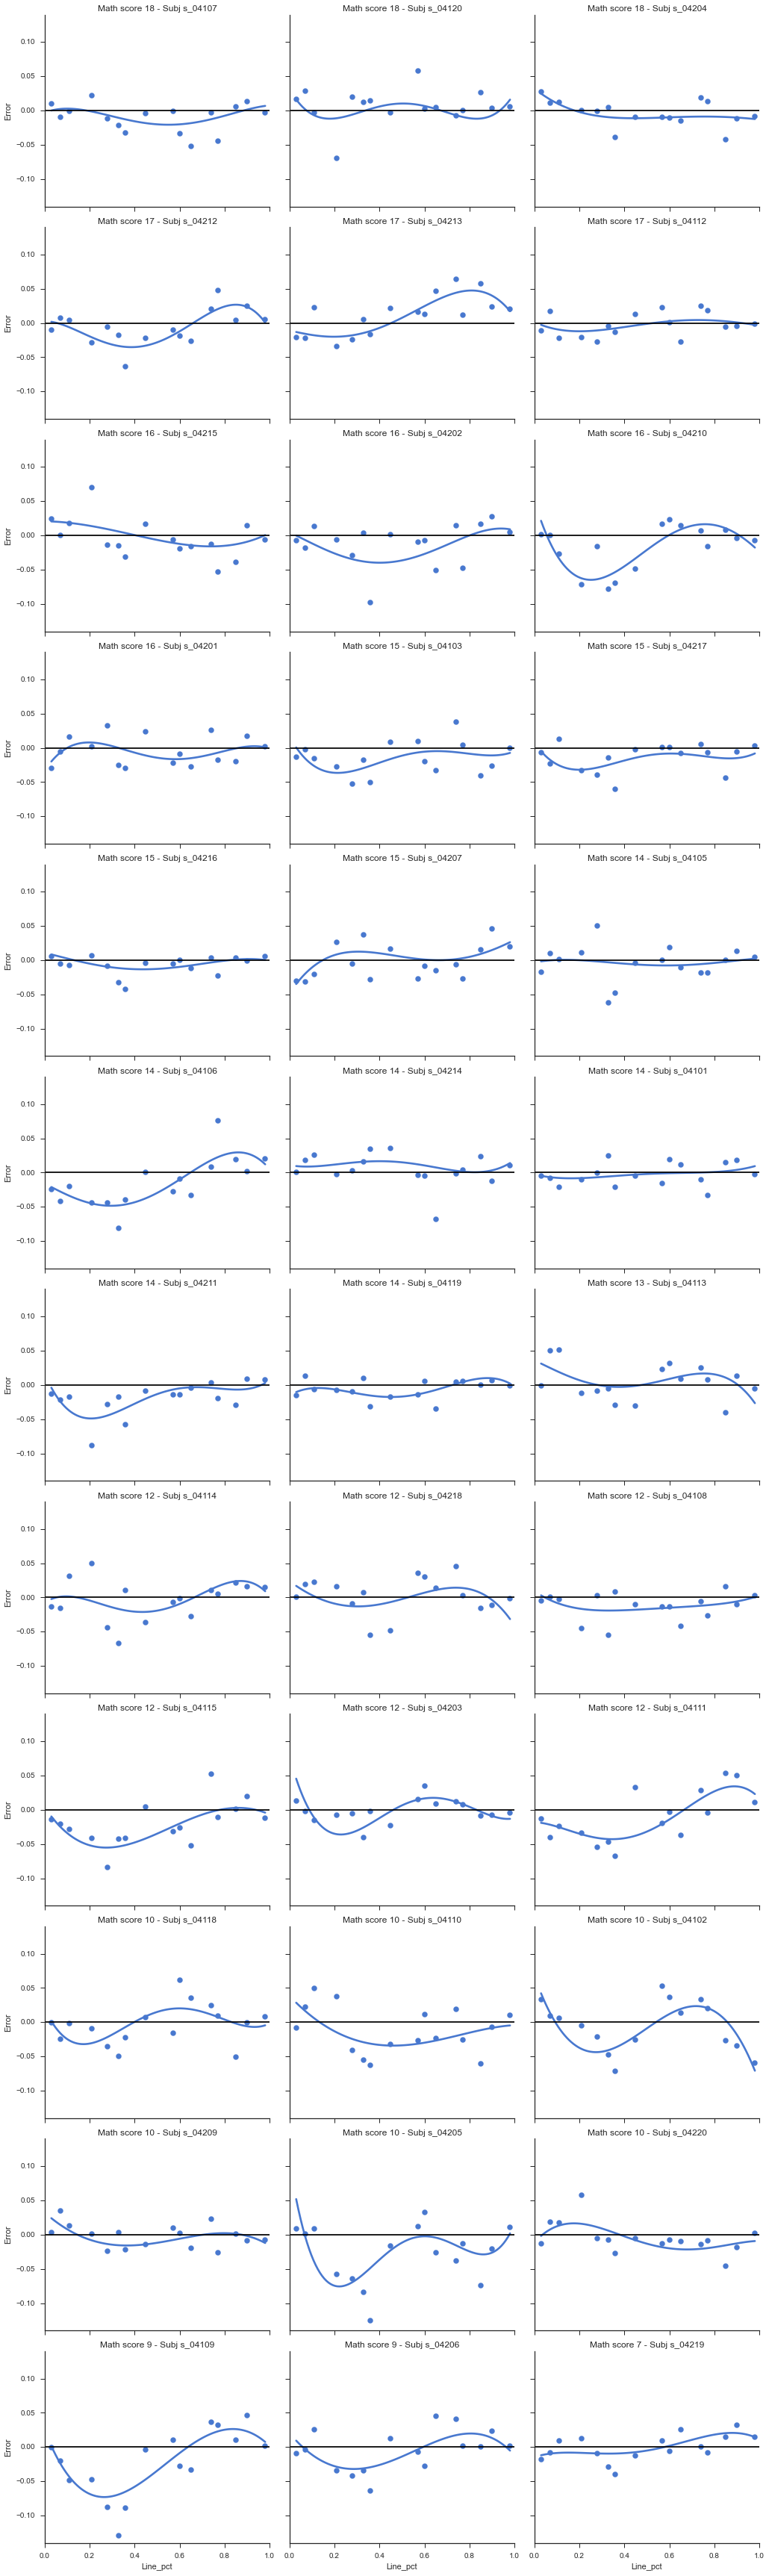

In [166]:
g = sns.FacetGrid(new_math_outlier[new_math_outlier['Task']==1],col='Subject',col_wrap=3,
                  col_order=ordered_math['Subject'],size=4,aspect=1.2)
g = (g.map(sns.regplot, 'Line_pct', 'Error',order=4,truncate=True,ci=None,x_estimator=np.median,
          scatter=True,color=pal[0]).set(ylim=(-0.14,0.14),xlim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.plot((0,1),(0,0),c='black')
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1

## Mixed Task

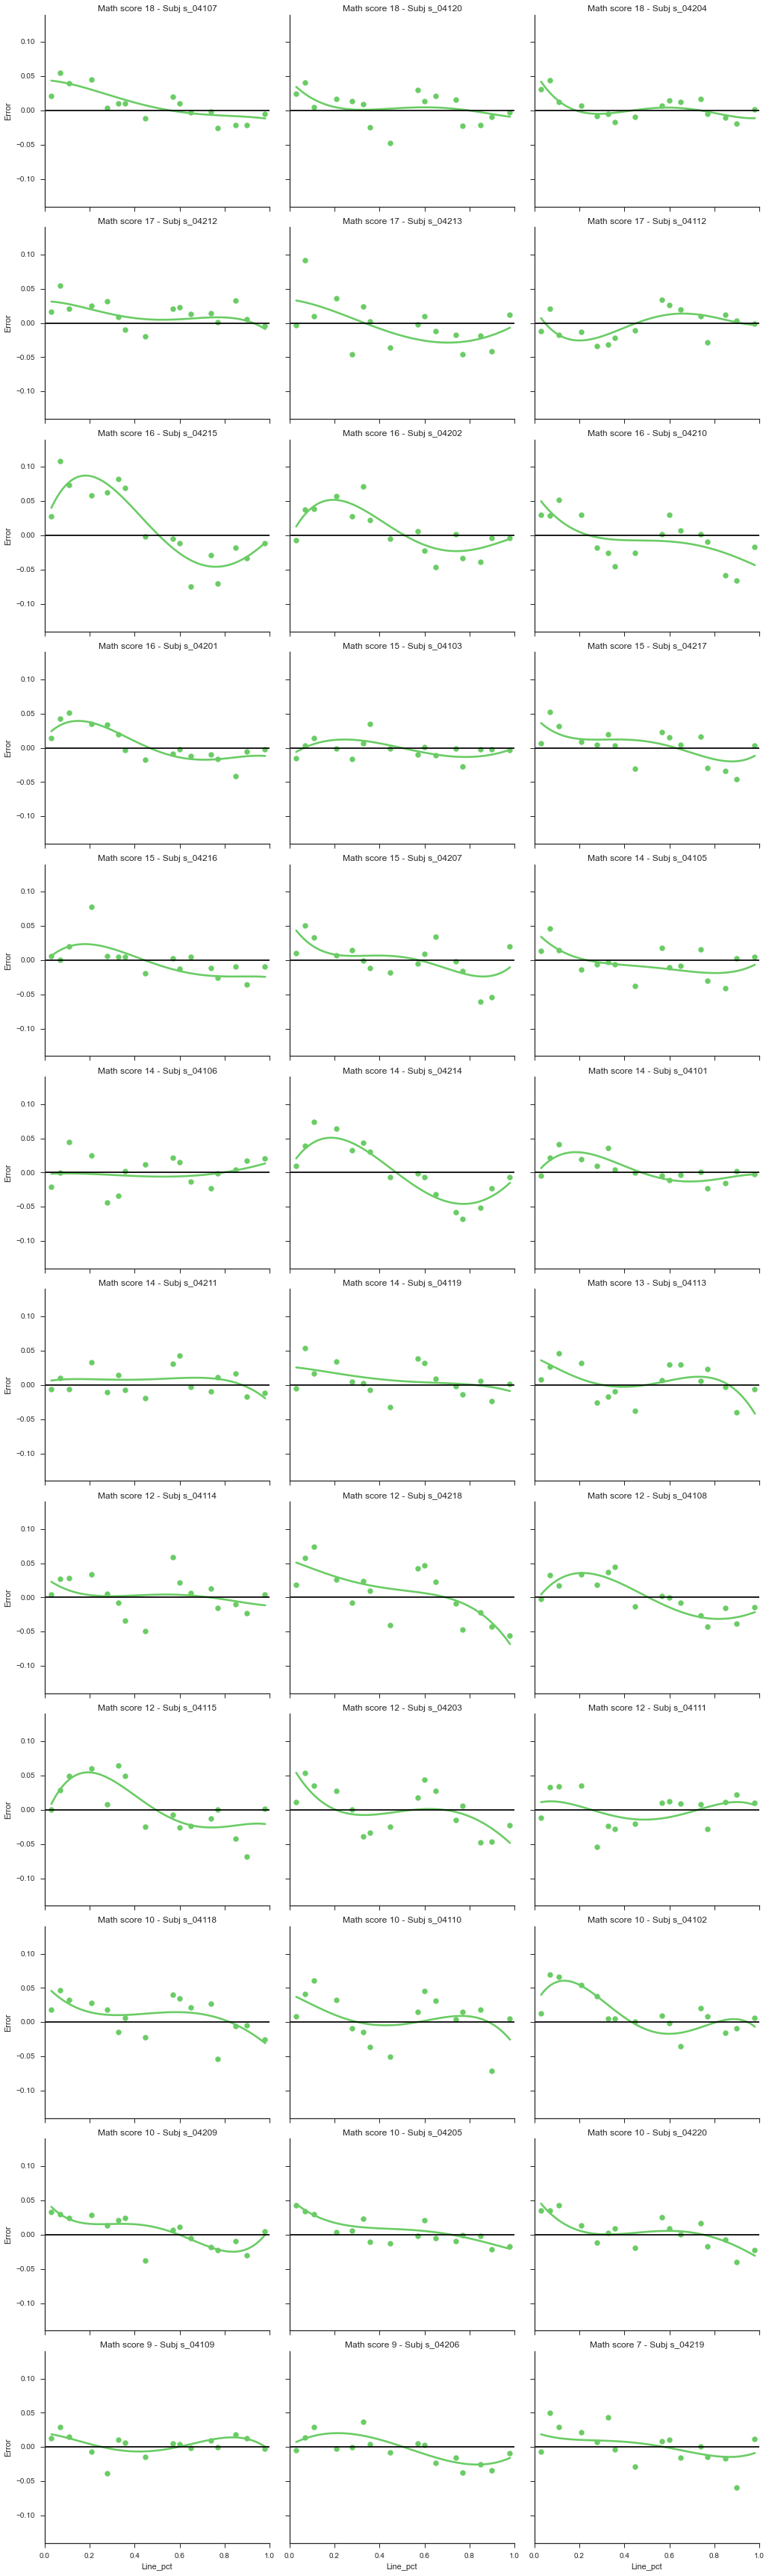

In [167]:
g = sns.FacetGrid(new_math_outlier[new_math_outlier['Task']==2],col='Subject',col_wrap=3,
                  col_order=ordered_math['Subject'],size=4,aspect=1.2)
g = (g.map(sns.regplot, 'Line_pct', 'Error',order=4,truncate=True,ci=None,x_estimator=np.median,
          scatter=True,color=pal[1]).set(ylim=(-0.14,0.14),xlim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.plot((0,1),(0,0),c='black')
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1

## SD Error Vs. Position

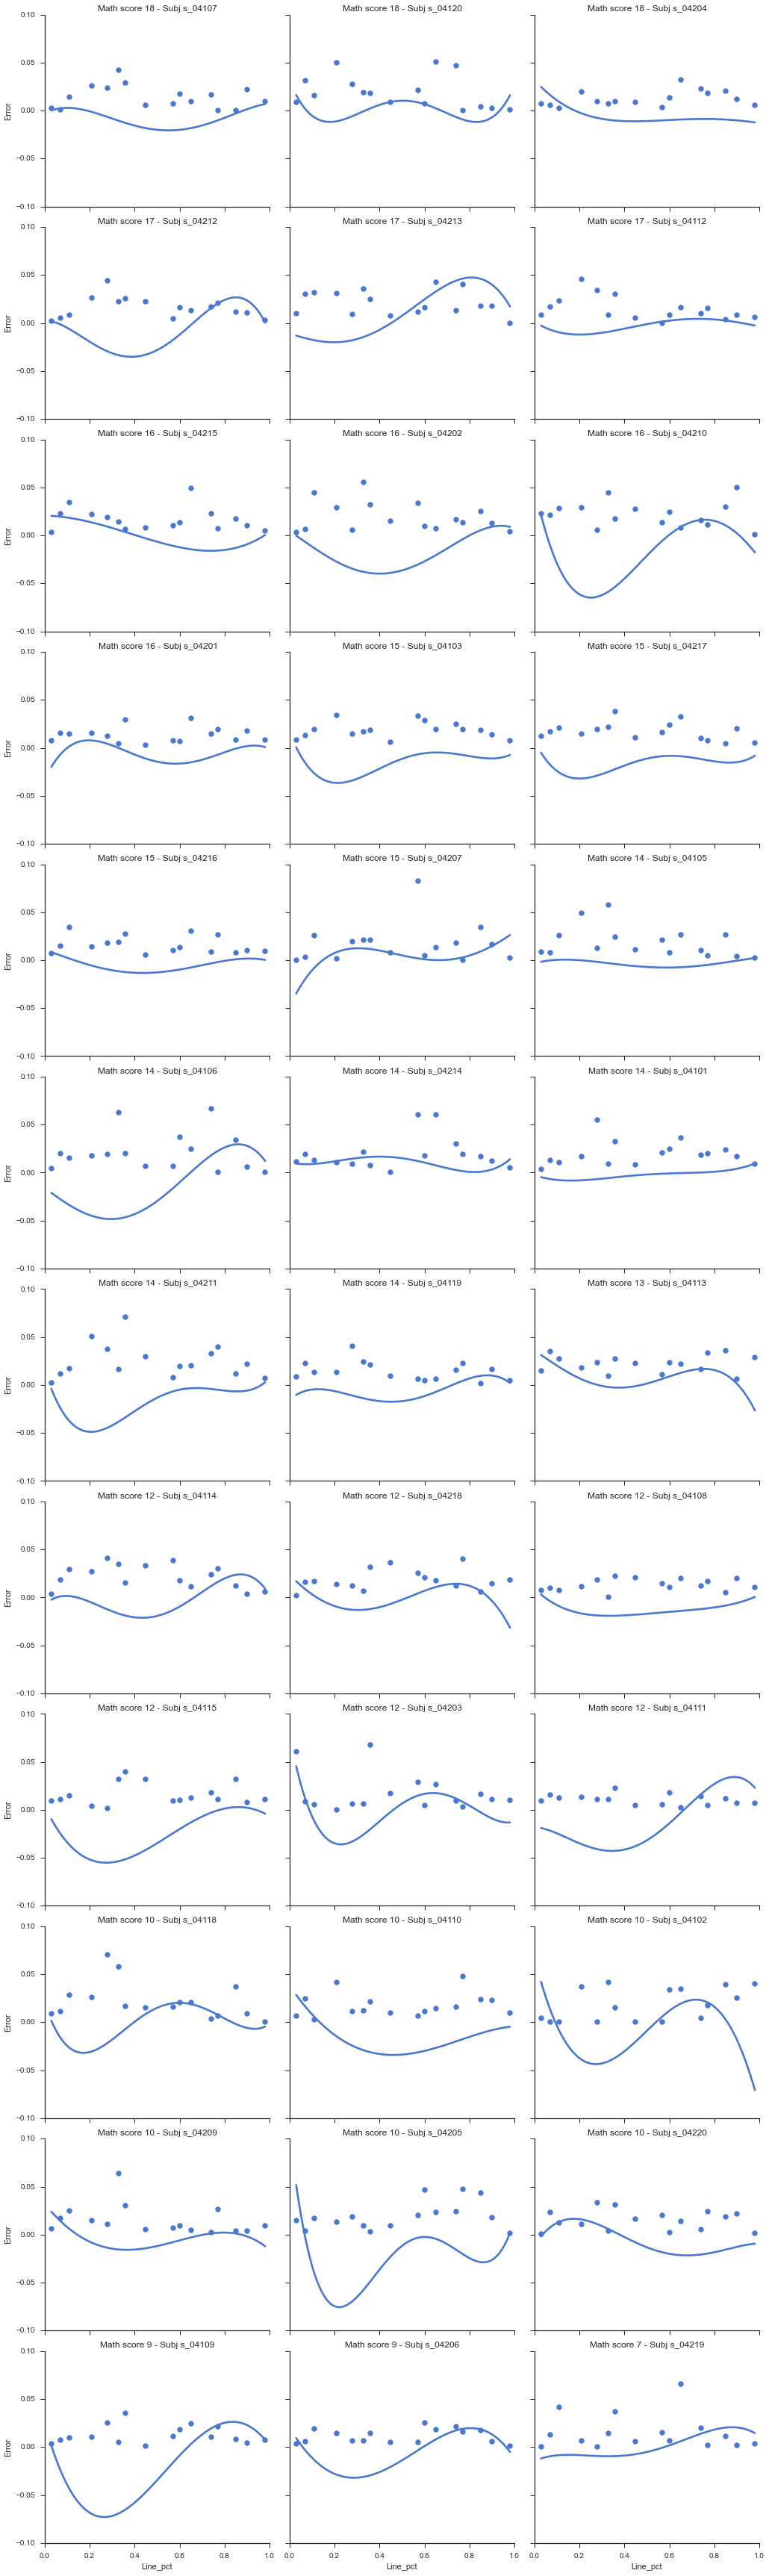

In [168]:
g = sns.FacetGrid(new_math_outlier[new_math_outlier['Task']==1],col='Subject',col_wrap=3,
                  col_order=ordered_math['Subject'],size=4,aspect=1.2)
g = (g.map(sns.regplot, 'Line_pct', 'Error',order=4,truncate=True,ci=None,x_estimator=np.std,
          scatter=True,color=pal[0]).set(xlim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1

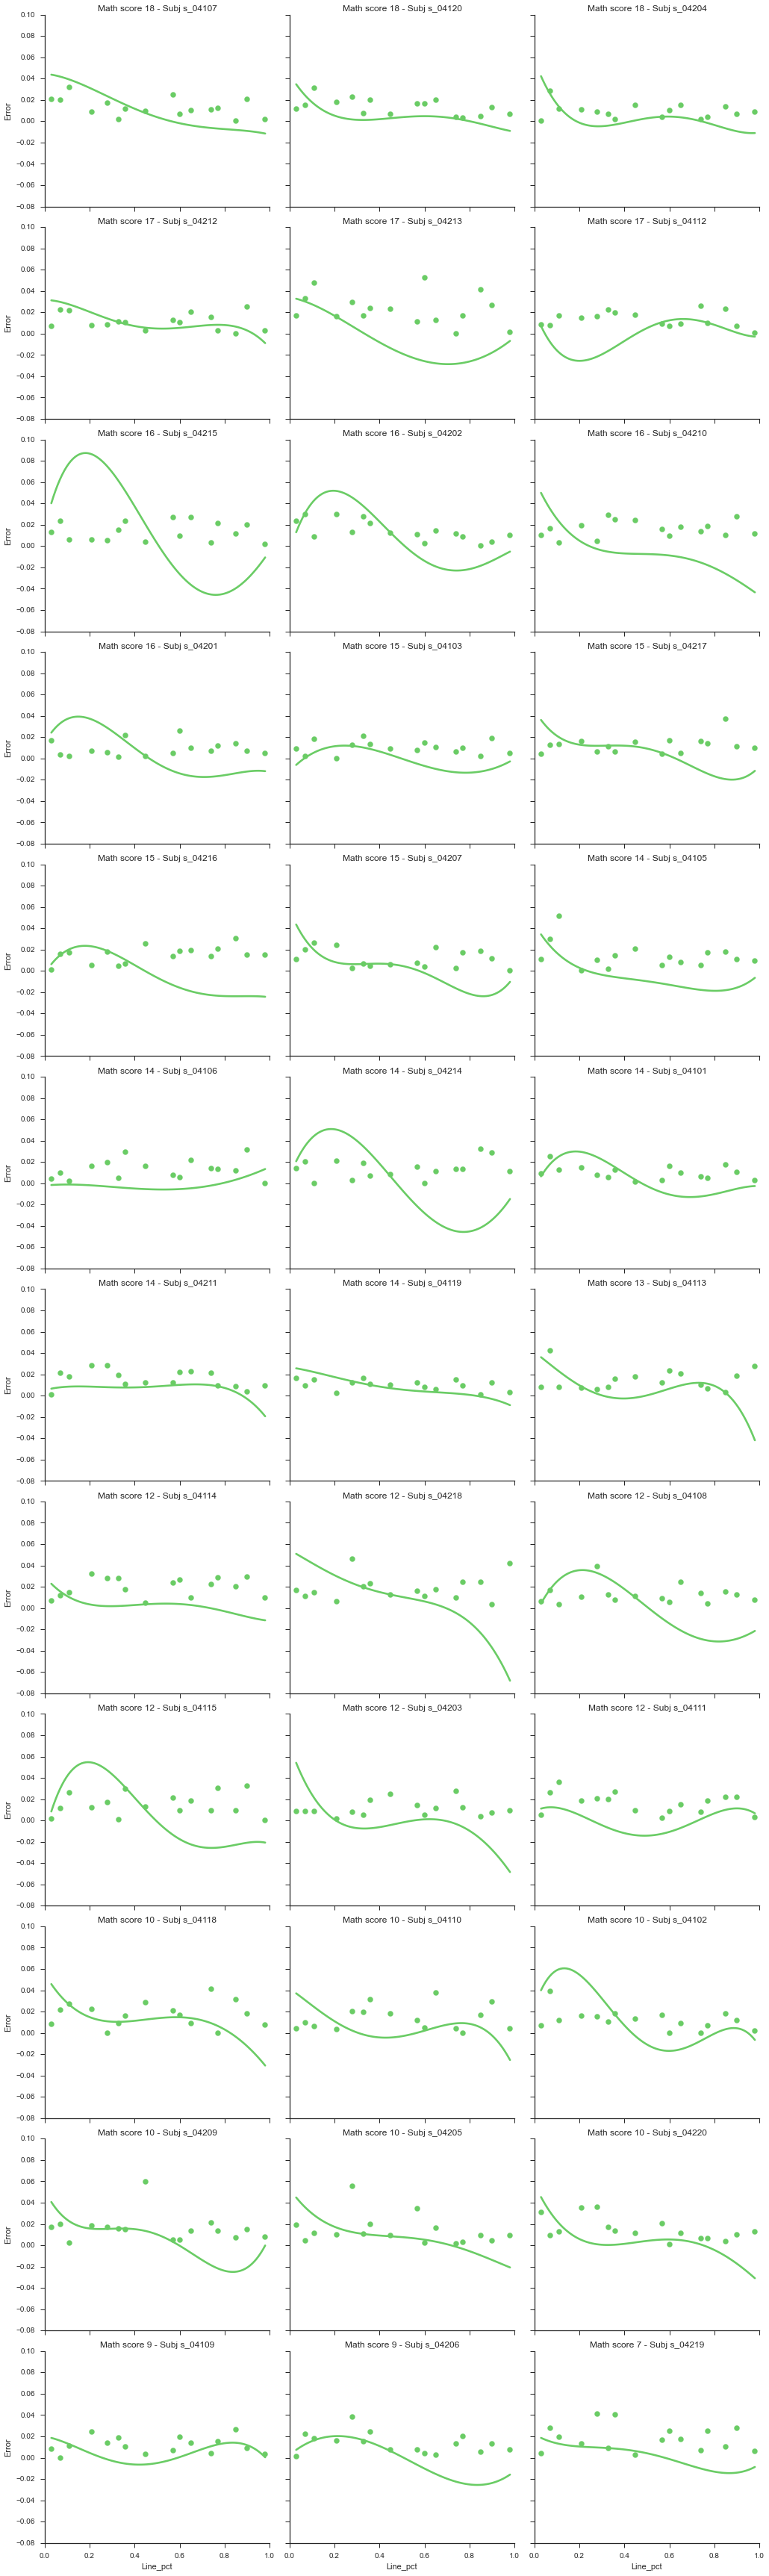

In [169]:
g = sns.FacetGrid(new_math_outlier[new_math_outlier['Task']==2],col='Subject',col_wrap=3,
                  col_order=ordered_math['Subject'],size=4,aspect=1.2)
g = (g.map(sns.regplot, 'Line_pct', 'Error',order=4,truncate=True,ci=None,x_estimator=np.std,
          scatter=True,color=pal[1]).set(xlim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1

## Make Result Table

In [170]:
group_task_t = new_df.groupby(['Subject', 'Task'])
#group_task_t['BigError'].sum()

In [171]:
np.sort(new_df['Subject'].unique())

array(['s_04101', 's_04102', 's_04103', 's_04105', 's_04106', 's_04107',
       's_04108', 's_04109', 's_04110', 's_04111', 's_04112', 's_04113',
       's_04114', 's_04115', 's_04118', 's_04119', 's_04120', 's_04201',
       's_04202', 's_04203', 's_04204', 's_04205', 's_04206', 's_04207',
       's_04209', 's_04210', 's_04211', 's_04212', 's_04213', 's_04214',
       's_04215', 's_04216', 's_04217', 's_04218', 's_04219', 's_04220'], dtype=object)

In [172]:
new_df.loc[:,:] = new_df.loc[new_df['Subject']!='s_04208',:]

In [173]:
new_df= new_df[pd.notnull(new_df['Subject'])]
np.sort(new_df['Subject'].unique())

array(['s_04101', 's_04102', 's_04103', 's_04105', 's_04106', 's_04107',
       's_04108', 's_04109', 's_04110', 's_04111', 's_04112', 's_04113',
       's_04114', 's_04115', 's_04118', 's_04119', 's_04120', 's_04201',
       's_04202', 's_04203', 's_04204', 's_04205', 's_04206', 's_04207',
       's_04209', 's_04210', 's_04211', 's_04212', 's_04213', 's_04214',
       's_04215', 's_04216', 's_04217', 's_04218', 's_04219', 's_04220'], dtype=object)

In [174]:
len(new_df)

4914

In [175]:
results_df = pd.DataFrame(new_df[new_df['Task']==1].groupby('Subject')['RT'].mean())
results_df.columns = ['RT+']
results_df['RT-'] = new_df[new_df['Task']==2].groupby('Subject')['RT'].mean()
results_df['RTw'] = new_df[new_df['Task']==3].groupby('Subject')['RT'].mean()

In [176]:
new_df.loc[:,:] = new_df.loc[new_df['BigError']==0,:]

In [177]:
new_df= new_df[pd.notnull(new_df['Subject'])]
len(new_df)

4853

In [178]:
np.sort(new_df['Subject'].unique())

array(['s_04101', 's_04102', 's_04103', 's_04105', 's_04106', 's_04107',
       's_04108', 's_04109', 's_04110', 's_04111', 's_04112', 's_04113',
       's_04114', 's_04115', 's_04118', 's_04119', 's_04120', 's_04201',
       's_04202', 's_04203', 's_04204', 's_04205', 's_04206', 's_04207',
       's_04209', 's_04210', 's_04211', 's_04212', 's_04213', 's_04214',
       's_04215', 's_04216', 's_04217', 's_04218', 's_04219', 's_04220'], dtype=object)

In [179]:
sds = []
for sub in np.sort(new_df['Subject'].unique()):
    grouped = new_df.loc[new_df['Subject']==sub].groupby(['Task', 'Line_pct'])
    for pos in grouped.groups.keys():
        task = pos[0]
        stim = pos[1]
        tmp = grouped.get_group((task,stim))['Error']
        tmp = np.nanstd(tmp)
        sds.append({'Subject':sub, 'Task':task, 'Line_pct':stim,
             'SD':tmp})
SD_df = pd.DataFrame(sds)
results_df['SD+'] = SD_df[SD_df['Task']==1].groupby('Subject')['SD'].mean()
results_df['SD-'] = SD_df[SD_df['Task']==2].groupby('Subject')['SD'].mean()
results_df['SDw'] = SD_df[SD_df['Task']==3].groupby('Subject')['SD'].mean()

Need to remove BigError from all the sources that feed into results_df like below res_df

In [180]:
group_task = new_df.groupby(['Subject','Task','Line_pct'])

In [181]:
error = group_task['AbsError'].mean()
response = group_task['Response'].mean()

In [182]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0
error_dict = {}
position_dict = {}
results_list = []
for s in np.sort(new_df['Subject'].unique()):
    error_dict[s] = {}
    position_dict[s] = {}
    for t in tasks:
        d_tmp = {}
        error_dict[s][t] = error.loc[s].loc[t]
        position_dict[s][t] = response.loc[s].loc[t]
        slope,inter,r,p,stderr = linregress(error_dict[s][t].index, error_dict[s][t])
        slope2,inter2,r2,p2,stderr2 = linregress(position_dict[s][t].index, position_dict[s][t])
        d_tmp = {'Subject':s, 'Task':t, 'slope_E':slope, 'slope_P':slope2, 'int_E':inter,
                 'int_P':inter2,'r_E':r, 'r_P':r2, 'p_E':p, 'p_P':p2, 'stderr_E':stderr,
                 'stderr_P':stderr2, 'R2_E':r*r, 'R2_P':r2*r2}
        results_list.append(d_tmp)
res_df = pd.DataFrame(results_list)      

In [183]:
r2_1 = res_df[['Subject','R2_P']][res_df['Task']==1]
r2_1.columns = ['Subject', 'R^2+']
results_df = results_df.join(r2_1.groupby('Subject').mean(), how='inner')

In [184]:
r2_2 = res_df[['Subject','R2_P']][res_df['Task']==2]
r2_2.columns = ['Subject', 'R^2-']
results_df = results_df.join(r2_2.groupby('Subject').mean(), how='inner')

In [185]:
r2_3 = res_df[['Subject','R2_P']][res_df['Task']==3]
r2_3.columns = ['Subject', 'R^2w']
results_df = results_df.join(r2_3.groupby('Subject').mean(), how='inner')

In [186]:
slope_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
slope_1.columns = ['Subject', 'slope+']
results_df = results_df.join(slope_1.groupby('Subject').mean(), how='inner')
slope_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
slope_2.columns = ['Subject', 'slope-']
results_df = results_df.join(slope_2.groupby('Subject').mean(), how='inner')
slope_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
slope_3.columns = ['Subject', 'slopew']
results_df = results_df.join(slope_3.groupby('Subject').mean(), how='inner')

In [187]:
PAE1 = new_df[new_df['Task']==1].groupby(['Subject', 'Line_pct'])['AbsError'].mean()
PAE2 = new_df[new_df['Task']==2].groupby(['Subject', 'Line_pct'])['AbsError'].mean()
PAE3 = new_df[new_df['Task']==3].groupby(['Subject', 'Line_pct'])['AbsError'].mean()

In [188]:
#PAE1.loc['s_02003'].iloc[0:8]

In [189]:
SD1 = SD_df[SD_df.Task == 1].groupby(['Subject', 'Line_pct'])['SD'].mean()
SD2 = SD_df[SD_df.Task == 2].groupby(['Subject', 'Line_pct'])['SD'].mean()
SD3 = SD_df[SD_df.Task == 3].groupby(['Subject', 'Line_pct'])['SD'].mean()

In [190]:
corrs1 = []
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
for sub in SD1.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,PAE1.loc[sub])
    corrs1.append({'Subject':sub, 'SD_Lan_+':r1})
DE1 = pd.DataFrame(corrs1)
results_df = results_df.join(DE1.groupby('Subject').mean(), how='inner')

In [191]:
corrs2 = []
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
for sub in SD2.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,SD2.loc[sub])
    corrs2.append({'Subject':sub, 'SD_Lan_-':r1})
DE2 = pd.DataFrame(corrs2)
results_df = results_df.join(DE2.groupby('Subject').mean(), how='inner')

In [192]:
corrs3 = []
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
for sub in SD3.index.levels[0]:
    zero = SD3.loc[sub].keys()
    mid = abs(SD3.loc[sub].keys()-.5)
    end = abs(SD3.loc[sub].keys()-1)
    dist_Land = pd.DataFrame([zero, mid, end]).min()
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,SD3.loc[sub])
    corrs3.append({'Subject':sub, 'SD_Lan_w':r1})
DE3 = pd.DataFrame(corrs3)
results_df = results_df.join(DE3.groupby('Subject').mean(), how='inner')

In [193]:
miss_df = pd.read_csv('nline_data_rep.csv',sep='\t')
miss_df.loc[:,:]= miss_df[miss_df['catch']<1]
#len(nline_miss)
miss_df['Missed'] = miss_df['Error']
miss_df.loc[miss_df['Missed']<1,'Missed'] = 0
miss_df = miss_df[pd.notnull(miss_df['Subject'])]

In [194]:
results_df['Miss+'] = miss_df[miss_df['Task']==1].groupby('Subject')['Missed'].sum()
results_df['Miss-'] = miss_df[miss_df['Task']==2].groupby('Subject')['Missed'].sum()
results_df['Missw'] =miss3 = miss_df[miss_df['Task']==3].groupby('Subject')['Missed'].sum()

In [195]:
math.columns = ['Subject', 'SAT']
results_df = results_df.join(math.groupby('Subject').mean(), how='inner')

Sort columns to make viewing easier

In [196]:
cols = results_df.columns.tolist()
cols = cols[-1:] + cols[-4:-1] + cols[0:-4]
results_df = results_df[cols]

In [197]:
results_df['AbsError+'] = new_df[new_df['Task']==1].groupby('Subject')['AbsError'].mean()
results_df['AbsError-'] = new_df[new_df['Task']==2].groupby('Subject')['AbsError'].mean()
results_df['AbsErrorw'] = new_df[new_df['Task']==3].groupby('Subject')['AbsError'].mean()

In [198]:
results_df.loc[:,'Error+'] = new_df[new_df['Task']==1].groupby('Subject')['Error'].mean()
results_df.loc[:,'Error-'] = new_df[new_df['Task']==2].groupby('Subject')['Error'].mean()
results_df.loc[:,'Errorw'] = new_df[new_df['Task']==3].groupby('Subject')['Error'].mean()

In [199]:
linear_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
linear_1.loc[:,'slope_P'] = abs(linear_1['slope_P'] - 1)
linear_1.columns = ['Subject', 'linearity+']
results_df = results_df.join(linear_1.groupby('Subject').mean(), how='inner')
linear_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
linear_2.loc[:,'slope_P'] = abs(linear_2['slope_P'] - 1)
linear_2.columns = ['Subject', 'linearity-']
results_df = results_df.join(linear_2.groupby('Subject').mean(), how='inner')
linear_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
linear_3.loc[:,'slope_P'] = abs(linear_3['slope_P'] - 1)
linear_3.columns = ['Subject', 'linearityw']
results_df = results_df.join(linear_3.groupby('Subject').mean(), how='inner')

In [200]:
results_df = results_df.loc[table_order]
results_df

SAT  Miss+  Miss-  Missw       RT+       RT-       RTw       SD+  \
Subject                                                                     
s_04107   18     10      5      0  2.206240  2.355675  2.205304  0.014091   
s_04120   18      3      1      5  1.939636  1.993921  1.966501  0.019477   
s_04204   18      0      1      3  2.030239  1.971791  2.178898  0.012239   
s_04212   17      0      3      0  2.264475  2.218658  1.942220  0.015652   
s_04213   17      3      3      3  2.145873  2.178027  2.056509  0.021047   
s_04112   17      5      2      1  2.178980  2.102155  2.036174  0.014851   
s_04215   16      4      4      6  2.261824  2.217628  2.186071  0.016516   
s_04202   16      1      1      1  1.942542  1.927917  1.933792  0.019469   
s_04210   16      1      1      3  2.004338  1.976409  2.101982  0.021627   
s_04201   16      0      1      1  2.135756  2.214647  1.987159  0.013284   
s_04103   15      5      5      1  2.300552  2.239401  2.108745  0.018327   
s_04217   15      1      1      0  2.090505  2.158358  1.952463  0.016921   
s_04216   15      1      1      0  2.180798  2.240157  2.053505  0.015907   
s_04207   15      4      3      1  2.290933  2.417147  2.193316  0.017003   
s_04105   14      5      8      2  2.252220  2.229470  2.091102  0.018708   
s_04106   14      7      6      7  2.268423  2.332033  2.232238  0.021326   
s_04214   14      0      5     13  2.319002  2.364537  2.196192  0.019547   
s_04101   14      3      0      1  2.145198  2.093322  2.143952  0.019737   
s_04211   14      1      1      0  2.005693  2.045403  2.091479  0.024816   
s_04119   14      0      1      0  2.222751  2.128750  2.142354  0.014330   
s_04113   13      2      0     13  2.188594  2.132140  1.988870  0.022245   
s_04114   12      0      1      2  2.106090  2.201944  2.181873  0.021447   
s_04218   12      0      2      1  1.866362  1.746202  1.899518  0.017915   
s_04108   12      1      0      0  2.080404  1.910496  1.760955  0.012856   
s_04115   12      0      0      0  1.678086  1.625987  1.741876  0.015804   
s_04203   12      4      5      0  2.270361  2.253583  1.966884  0.017563   
s_04111   12      1      1      0  2.023398  2.061451  2.083447  0.010547   
s_04118   10      3      2      1  2.057482  2.061380  1.971918  0.021681   
s_04110   10      4      2      2  2.096919  2.163236  1.883929  0.017564   
s_04102   10      5      1      4  2.196633  2.052878  2.023957  0.018284   
s_04209   10      0      0      3  2.029619  2.026767  1.993411  0.014974   
s_04205   10      2      1      1  1.733317  1.788421  1.586804  0.019497   
s_04220   10      2      2      1  2.215913  2.287166  2.024251  0.014862   
s_04109    9      1      2      1  2.063937  1.989656  1.806679  0.012545   
s_04206    9      1      2      0  2.181649  2.271398  1.890102  0.011525   
s_04219    7      3      1      3  1.998339  2.137177  2.104694  0.015172   

              SD-       SDw     ...      SD_Lan_w  AbsError+  AbsError-  \
Subject                         ...                                       
s_04107  0.012967  0.005762     ...     -0.322618   0.020440   0.022059   
s_04120  0.013560  0.005028     ...     -0.152131   0.023819   0.023627   
s_04204  0.009133  0.002849     ...     -0.404589   0.017568   0.015146   
s_04212  0.011193  0.004042     ...      0.322288   0.023404   0.019578   
s_04213  0.023011  0.004724     ...     -0.198365   0.030852   0.033604   
s_04112  0.013284  0.003981     ...     -0.335469   0.018953   0.021290   
s_04215  0.013420  0.004544     ...      0.098768   0.025900   0.043528   
s_04202  0.014088  0.002693     ...     -0.339281   0.031074   0.027560   
s_04210  0.015947  0.006555     ...     -0.078612   0.033630   0.029956   
s_04201  0.008990  0.009543     ...     -0.226072   0.021446   0.022194   
s_04103  0.009800  0.005427     ...      0.152976   0.025424   0.013564   
s_04217  0.012382  0.002122     ...     -0.049773   0.023029   0.021720   
s_04216  0.014844  0.002374     

In [201]:
results_df.to_excel('Results Table_Rep.xlsx', index_label='Subject', merge_cells=False)

# Task contrasts for main variables

In [202]:
from scipy.stats import ttest_rel
import pyvttbl as pt

In [203]:
aov_df = pt.DataFrame()

In [204]:
conditions = {'RT': ['RT+', 'RT-', 'RTw'],'AbsError':['AbsError+', 'AbsError-', 'AbsErrorw'],
              'Error':['Error+', 'Error-', 'Errorw'],'SD':['SD+', 'SD-', 'SDw']}
for index, row in results_df.iterrows():
    for task in range(0,3):
        tmp = {'Sub': index}
        for cond in conditions.keys():
            tmp[cond] = row[conditions[cond][task]]
            cond_name = cond+'_cond'
            tmp[cond_name] = conditions[cond][task]
        aov_df.insert(tmp)

## RT

In [205]:
aov = aov_df.anova('RT', sub='Sub', wfactors=['RT_cond'])
print(aov)

RT ~ RT_cond

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: RT
    Source                            Type III    eps      df      MS       F        Sig.      et2_G   Obs.    SE     95% CI   lambda   Obs.  
                                         SS                                                                                             Power 
RT_cond          Sphericity Assumed      0.206       -        2   0.103   14.805   4.342e-06   0.079     36   0.014    0.028   15.228   0.938 
                 Greenhouse-Geisser      0.206   0.680    1.359   0.152   14.805   8.810e-05   0.079     36   0.014    0.028   15.228   0.852 
                 Huynh-Feldt             0.206   0.680    1.359   0.152   14.805   8.810e-05   0.079     36   0.014    0.028   15.228   0.852 
                 Box                     0.206   0.500        1   0.206   14.805   4.838e-04   0.079     36   0.014    0.028   15.228   0.765 
----------------------------------------------------------------------------------

In [206]:
ttest_rel(results_df['RT+'], results_df['RT-'])

Ttest_relResult(statistic=-0.29891090535082776, pvalue=0.76677570279879337)

In [207]:
ttest_rel(results_df['RT+'], results_df['RTw'])

Ttest_relResult(statistic=4.1992616832931802, pvalue=0.00017475433157661594)

In [208]:
ttest_rel(results_df['RT-'], results_df['RTw'])

Ttest_relResult(statistic=4.148679219754313, pvalue=0.00020262734349717936)

No differences between tasks in the fMRI task but signicant differences between bnumber tasks and wiord task in the behavioral replication

In [209]:
results_df[['RT+','RT-','RTw','AbsError+','AbsError-','AbsErrorw','Error+',
           'Error-','Errorw','SD+','SD-','SDw']].std()

RT+          0.151343
RT-          0.175305
RTw          0.145882
AbsError+    0.006288
AbsError-    0.006295
AbsErrorw    0.002273
Error+       0.008672
Error-       0.005325
Errorw       0.001499
SD+          0.003412
SD-          0.003012
SDw          0.001903
dtype: float64

## MAE

In [210]:
aov = aov_df.anova('AbsError', sub='Sub', wfactors=['AbsError_cond'])
print(aov)

AbsError ~ AbsError_cond

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: AbsError
       Source                               Type III    eps      df        MS          F        Sig.      et2_G   Obs.      SE       95% CI   lambda    Obs.  
                                               SS                                                                                                       Power 
AbsError_cond          Sphericity Assumed      0.009       -        2       0.005   193.524   3.018e-29   3.067     36   8.202e-04    0.002   199.054       1 
                       Greenhouse-Geisser      0.009   0.611    1.222       0.007   193.524   8.256e-19   3.067     36   8.202e-04    0.002   199.054       1 
                       Huynh-Feldt             0.009   0.611    1.222       0.007   193.524   8.256e-19   3.067     36   8.202e-04    0.002   199.054       1 
                       Box                     0.009   0.500        1       0.009   193.524   7.956e-16   3.067     36   8.202e

In [211]:
ttest_rel(results_df['AbsError+'], results_df['AbsError-'])

Ttest_relResult(statistic=1.377709652616363, pvalue=0.17703900061580738)

In [212]:
ttest_rel(results_df['AbsError+'], results_df['AbsErrorw'])

Ttest_relResult(statistic=19.859894460677154, pvalue=1.2304467089215354e-20)

In [213]:
ttest_rel(results_df['AbsError-'], results_df['AbsErrorw'])

Ttest_relResult(statistic=17.224132489382946, pvalue=1.1440934844645108e-18)

Significant differences between both number tasks and the word task in fMRI task and behavioral replication

## Variability

In [214]:
aov = aov_df.anova('SD', sub='Sub', wfactors=['SD_cond'])
print(aov)

SD ~ SD_cond

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: SD
    Source                            Type III     eps      df        MS          F        Sig.      et2_G   Obs.      SE        95% CI     lambda    Obs.  
                                         SS                                                                                                           Power 
SD_cond          Sphericity Assumed       0.003       -        2       0.001   199.926   1.148e-29   3.427     36   4.582e-04   8.981e-04   205.638       1 
                 Greenhouse-Geisser       0.003   0.568    1.136       0.003   199.926   6.723e-18   3.427     36   4.582e-04   8.981e-04   205.638       1 
                 Huynh-Feldt              0.003   0.568    1.136       0.003   199.926   6.723e-18   3.427     36   4.582e-04   8.981e-04   205.638       1 
                 Box                      0.003   0.500        1       0.003   199.926   4.895e-16   3.427     36   4.582e-04   8.981e-04   205.638   1.000

In [215]:
ttest_rel(results_df['SD+'], results_df['SD-'])

Ttest_relResult(statistic=5.5828937792046629, pvalue=2.7396356343935365e-06)

In [216]:
ttest_rel(results_df['SD+'], results_df['SDw'])

Ttest_relResult(statistic=17.986562598016629, pvalue=2.9183108320746791e-19)

In [217]:
ttest_rel(results_df['SD-'], results_df['SDw'])

Ttest_relResult(statistic=14.596583418859291, pvalue=1.8808904620536513e-16)

Significant differences between all tasks in both fMRI task and behavioral replication. Importantly, we find a significant difference between positive and mixed task in variability with estimates being overall more precise for the Mixed task

# Accuracy Vs Math relations

##  PAE Vs. Math Score

([<matplotlib.axis.YTick at 0x116051d90>,
 <a list of 4 Text yticklabel objects>)

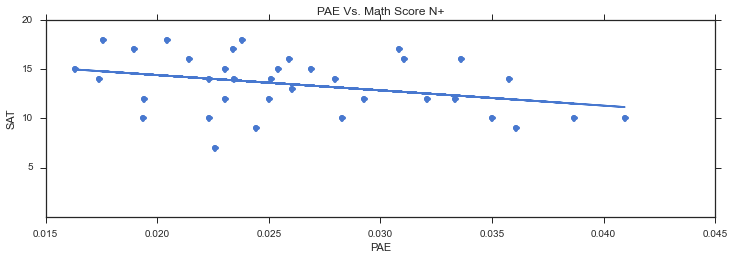

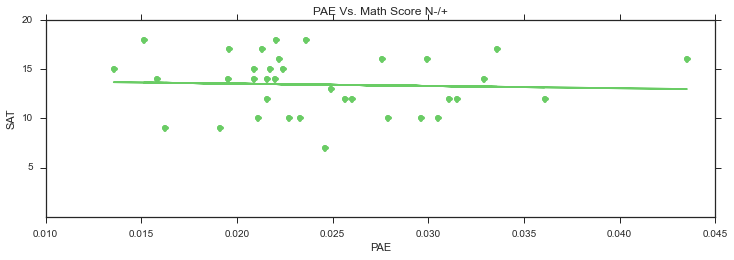

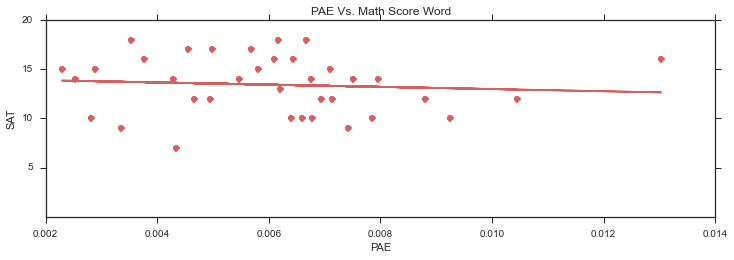

In [218]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(results_df['AbsError+'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError+'],
          results_df['SAT'], 'o', color=pal[0])
plt.plot(results_df['AbsError+'], 
         m1*results_df['AbsError+'] + b1, '-', color=pal[0])
plt.title('PAE Vs. Math Score N+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(results_df['AbsError-'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError-'],
          results_df['SAT'], 'o', color=pal[1])
plt.plot(results_df['AbsError-'], 
         m2*results_df['AbsError-'] + b2, '-', color=pal[1])
plt.title('PAE Vs. Math Score N-/+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m3, b3 = np.polyfit(results_df['AbsErrorw'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsErrorw'],
          results_df['SAT'], 'o', color=pal[2])
plt.plot(results_df['AbsErrorw'], 
         m3*results_df['AbsErrorw'] + b3, '-', color=pal[2])
plt.title('PAE Vs. Math Score Word')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

In [219]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [220]:
slope1, intercept1, r1, p1, stderr1 = linregress(results_df['AbsError+'],results_df['SAT'])
slope2, intercept2, r2, p2, stderr2 = linregress(results_df['AbsError-'],results_df['SAT'])
slope3, intercept3, r3, p3, stderr3 = linregress(results_df['AbsErrorw'],results_df['SAT'])

### Slope +, Slope -, Slope w

In [221]:
print slope1, slope2, slope3

-155.107781384 -23.3403502405 -111.909032729


### r +, r -, r w

In [222]:
print r1, r2, r3

-0.331634543232 -0.0499581362499 -0.0864752905805


### R^2 +, R^2 -, R^2 w

In [223]:
print r1*r1, r2*r2, r3*r3

0.109981470265 0.00249581537756 0.00747797588098


### p-value +, p-value -, p-value w

In [224]:
print p1, p2, p3

0.048165979653 0.77231291379 0.616032157404


## SD error Vs. SAT

(0, 0.04)

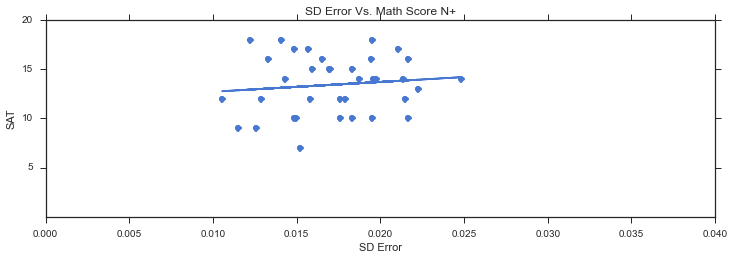

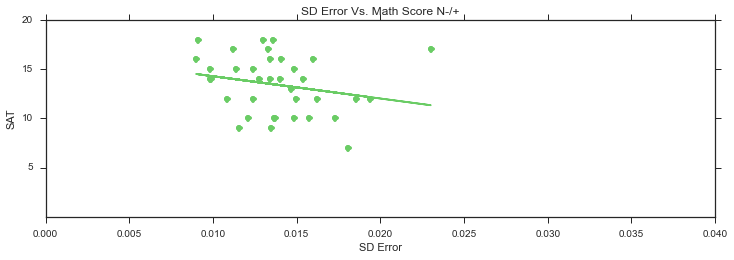

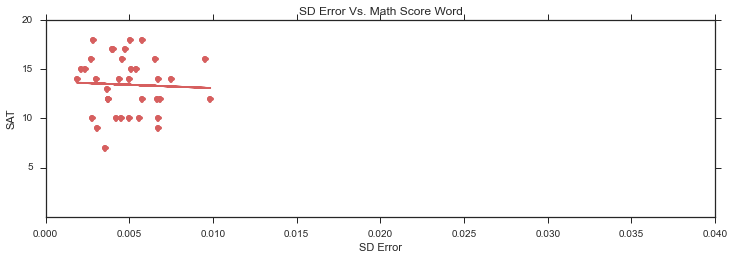

In [225]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(results_df['SD+'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['SD+'],
          results_df['SAT'], 'o', color=pal[0])
plt.plot(results_df['SD+'], 
         m1*results_df['SD+'] + b1, '-', color=pal[0])
plt.title('SD Error Vs. Math Score N+')
plt.xlabel('SD Error', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.xlim([0,0.04])

m2, b2 = np.polyfit(results_df['SD-'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['SD-'],
          results_df['SAT'], 'o', color=pal[1])
plt.plot(results_df['SD-'], 
         m2*results_df['SD-'] + b2, '-', color=pal[1])
plt.title('SD Error Vs. Math Score N-/+')
plt.xlabel('SD Error', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.xlim([0,0.04])

m3, b3 = np.polyfit(results_df['SDw'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['SDw'],
          results_df['SAT'], 'o', color=pal[2])
plt.plot(results_df['SDw'], 
         m3*results_df['SDw'] + b3, '-', color=pal[2])
plt.title('SD Error Vs. Math Score Word')
plt.xlabel('SD Error', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.xlim([0,0.04])

In [226]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [227]:
slope1, intercept1, r1, p1, stderr1 = linregress(results_df['SD+'],results_df['SAT'])
slope2, intercept2, r2, p2, stderr2 = linregress(results_df['SD-'],results_df['SAT'])
slope3, intercept3, r3, p3, stderr3 = linregress(results_df['SDw'],results_df['SAT'])

In [228]:
print r1, r2, r3

0.115595450548 -0.231681271578 -0.0438491789754


In [229]:
print p1, p2, p3

0.501996709267 0.173952809648 0.799548066908


In [230]:
np.corrcoef(results_df['slope-'], results_df['slope+'])

array([[ 1.        ,  0.43475022],
       [ 0.43475022,  1.        ]])

In [231]:
responses = position_tasks.Response.mean()

In [232]:
resp1 = responses.iloc[0:16]
resp2 = responses.iloc[16:32]
resp3 = responses.iloc[32:48]
resp1 = resp1.get_values()
resp2 = resp2.get_values()
resp3 = resp3.get_values()

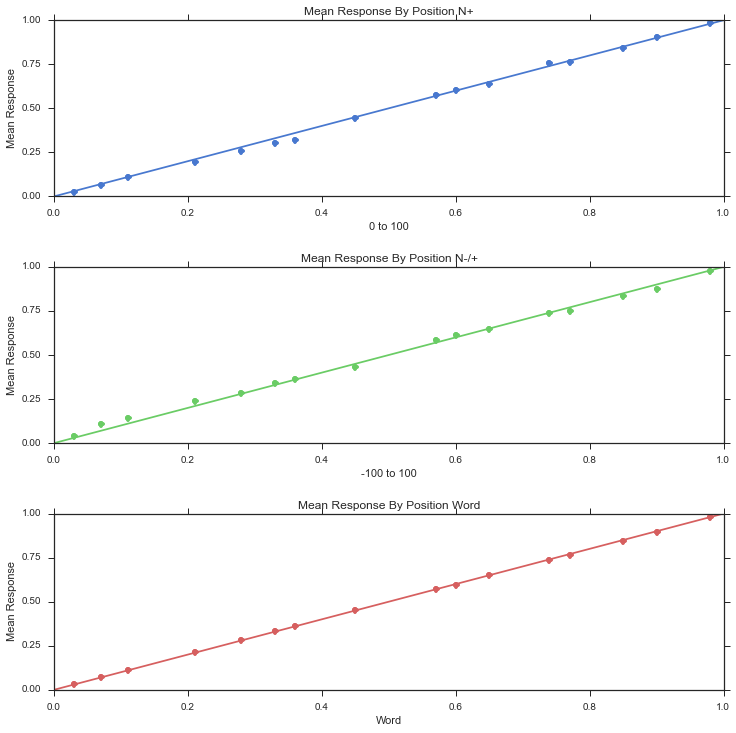

In [233]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, resp1, 'o', color=pal[0])
fig1.plot([0,1], [0,1], color=pal[0], linestyle='-')
plt.title('Mean Response By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([0,.25,.5,.75,1]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, resp2, 'o', color=pal[1])
fig2.plot([0,1], [0,1], color=pal[1], linestyle='-')
plt.title('Mean Response By Position N-/+')
plt.xlabel('-100 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([0,.25,.5,.75,1]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, resp3, 'o', color=pal[2])
fig3.plot([0,1], [0,1], color=pal[2], linestyle='-')
plt.title('Mean Response By Position Word')
plt.xlabel('Word', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([0,.25,.5,.75,1]))

plt.subplots_adjust(hspace=.4)

In [234]:
results_df.corr()

SAT     Miss+     Miss-     Missw       RT+       RT-  \
SAT         1.000000  0.161182  0.216531  0.066163  0.229023  0.188110   
Miss+       0.161182  1.000000  0.592442  0.056459  0.392325  0.429873   
Miss-       0.216531  0.592442  1.000000  0.160770  0.582263  0.575633   
Missw       0.066163  0.056459  0.160770  1.000000  0.247514  0.207489   
RT+         0.229023  0.392325  0.582263  0.247514  1.000000  0.892334   
RT-         0.188110  0.429873  0.575633  0.207489  0.892334  1.000000   
RTw         0.415227  0.327304  0.384463  0.296306  0.620622  0.650841   
SD+         0.115595  0.138975  0.117890  0.383285 -0.036442 -0.009060   
SD-        -0.231681 -0.102152 -0.107169  0.091728 -0.329123 -0.182266   
SDw        -0.043849  0.046833 -0.021828 -0.129931 -0.195975 -0.151804   
R^2+        0.378231 -0.051149  0.022410 -0.022474  0.368233  0.346908   
R^2-        0.035269 -0.085532 -0.162414 -0.296826 -0.021208  0.004192   
R^2w        0.005407  0.047535  0.084765 -0.028136  0.051391 -0.025289   
slope+     -0.076125 -0.060137  0.012339 -0.220559 -0.185520 -0.106429   
slope-     -0.002046  0.168193  0.006131 -0.209877  0.104563  0.123176   
slopew      0.096900  0.200205  0.330072 -0.081058  0.075656  0.095728   
SD_Lan_+    0.165426  0.152270  0.110458 -0.297085 -0.093407 -0.078001   
SD_Lan_-   -0.302293 -0.177319 -0.156181 -0.371124 -0.168931 -0.076094   
SD_Lan_w   -0.201702 -0.262430  0.022791 -0.002992  0.043137  0.069241   
AbsError+  -0.331635  0.106339  0.007068  0.124156 -0.343663 -0.291090   
AbsError-  -0.049958 -0.009238  0.098417  0.313311 -0.105122 -0.136005   
AbsErrorw  -0.086475  0.051053 -0.044356 -0.020643 -0.171323 -0.114390   
Error+      0.163096  0.016752  0.155544  0.457632  0.460677  0.444480   
Error-     -0.107579  0.008440 -0.269991 -0.026410 -0.236421 -0.288386   
Errorw     -0.102267  0.178382  0.211100  0.014206 -0.092064 -0.026032   
linearity+ -0.123579 -0.019073  0.028794  0.034790 -0.084398 -0.029672   
linearity-  0.062872 -0.104917  0.014785  0.228602 -0.080652 -0.123772   
linearityw -0.137031 -0.183825 -0.274525  0.046351 -0.029140 -0.069914   

                 RTw       SD+       SD-       SDw     ...      SD_Lan_w  \
SAT         0.415227  0.115595 -0.231681 -0.043849     ...     -0.201702   
Miss+       0.327304  0.138975 -0.102152  0.046833     ...     -0.262430   
Miss-       0.384463  0.117890 -0.107169 -0.021828     ...      0.022791   
Missw       0.296306  0.383285  0.091728 -0.129931     ...     -0.002992   
RT+         0.620622 -0.036442 -0.329123 -0.195975     ...      0.043137   
RT-         0.650841 -0.009060 -0.182266 -0.151804     ...      0.069241   
RTw         1.000000  0.156846 -0.031297 -0.171546     ...     -0.010629   
SD+         0.156846  1.000000  0.354160 -0.127377     ...      0.038030   
SD-        -0.031297  0.354160  1.000000 -0.065528     ...      0.127480   
SDw        -0.171546 -0.127377 -0.065528  1.000000     ...      0.032884   
R^2+        0.520426 -0.163471 -0.042148 -0.189695     ...      0.114497   
R^2-       -0.080102 -0.286420 -0.414062 -0.025089     ...      0.064026   
R^2w        0.162718  0.123427  0.244982 -0.569719     ...      0.078613   
slope+     -0.067461  0.077893  0.271299  0.250290     ...      0.100683   
slope-      0.097432 -0.044947 -0.126764 -0.045310     ...      0.028238   
slopew     -0.011889  0.071812 -0.053924 -0.498413     ...      0.014203   
SD_Lan_+   -0.130585 -0.011835  0.026498  0.220402     ...      0.071851   
SD_Lan_-   -0.123014 -0.140716  0.148269  0.120195     ...      0.200359   
SD_Lan_w   -0.010629  0.038030  0.127480  0.032884     ...      1.000000   
AbsError+  -0.320719  0.369569  0.240074  0.241801     ...     -0.137278   
AbsError-  -0.035512  0.269241  0.488165  0.069838     ...     -0.065147   
AbsErrorw  -0.172030 -0.051756 -0.053708  0.938417     ...     -0.010913   
Error+      0.463018  0.090762  0.261607 -0.233192     ...      0.009420   
Error-     -0.207841  0.053509 -0.123886 -0.02

In [235]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

### SD_Lan_+ = correlation between landmark distance and SD of error

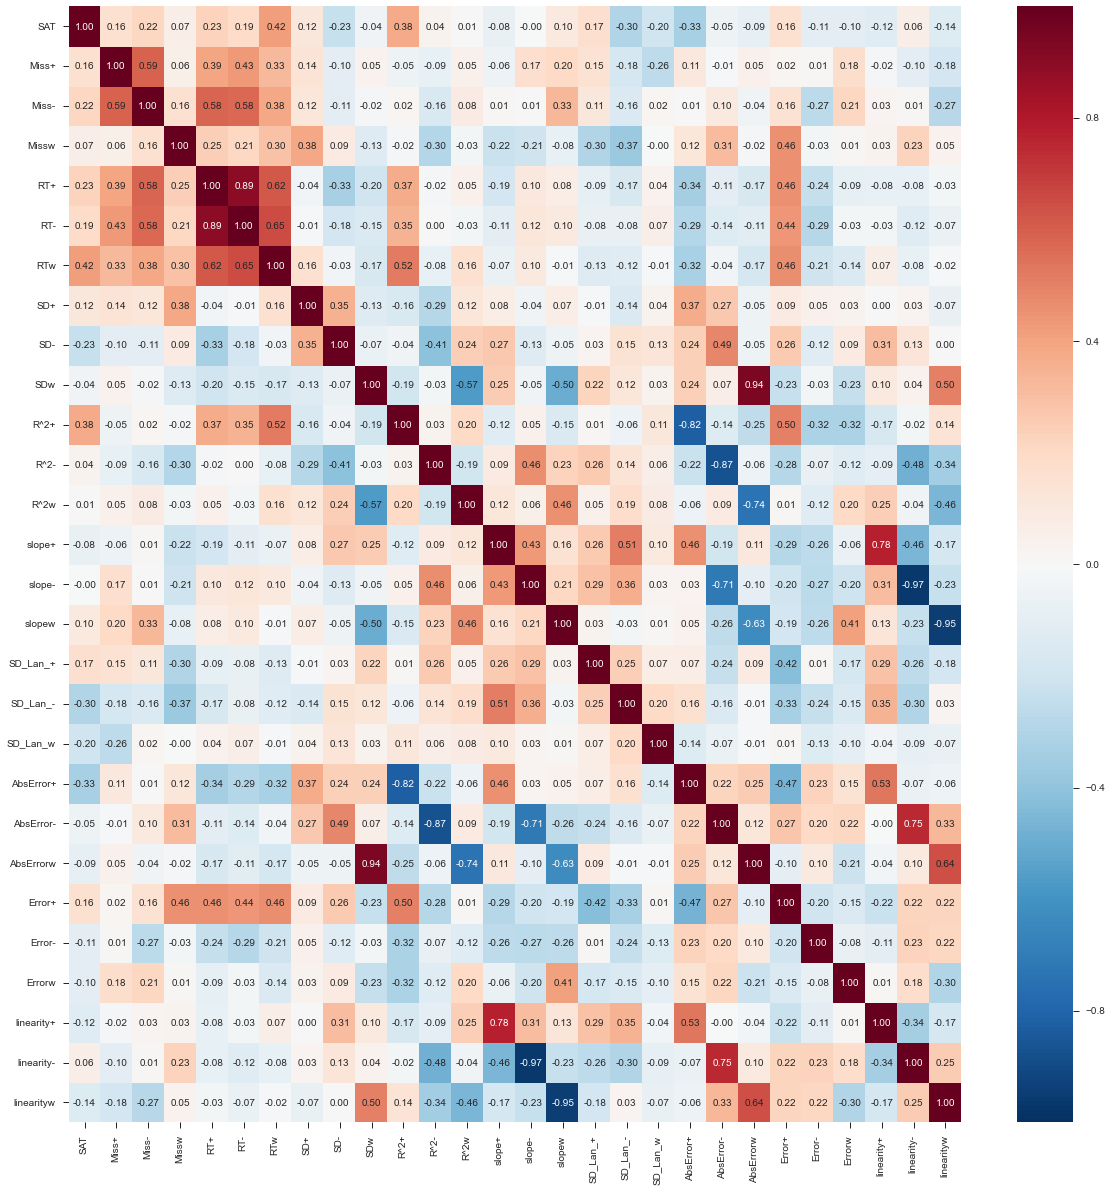

In [236]:
plt.figure(figsize=(20, 20))
sns.heatmap(results_df.corr(), annot=True, fmt='.2f')